# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

df12 = pd.read_parquet('D:\\UpGrad Sessions\\AI-ML Course\\SQL\\EDA Assignment\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
df12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
### Note Student Comment - All my comments are in the code itself. I have tried to explain the code as much as possible. All my analytical observations are stated after the '###' symbol 
### and the code is explained with normal '#' comments.
### I have stored and created new data frames based on various important data milestones to reduce the requirement to run the entire file eveytime I load it. This is to reduce the time taken to run the code.

### Assumptions - I have assumed that the data is clean and contains data as per year and month.
### I have also assumed that the data is not corrupted and is in the correct format.
### The sample() function is used to get a random sample of the data as given in isnstructions below. However, I have used the same sample function to the required 300000 rows
### as the data is huge and it is not possible to analyze the entire data at once. I have used the same sample function to get the required 300000 rows for analysis.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('D:\\UpGrad Sessions\\AI-ML Course\\SQL\\EDA Assignment\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
data_dir = 'D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//trip_records1'


# Create a list of all the twelve files to read
file_list = os.listdir(data_dir)
# sort all file monthwise
file_list.sort(key= lambda x: int(x.split('-')[1].split('.')[0]))

# initialise an empty dataframe
df_yearly = pd.DataFrame()

# Function to sample data by date and hour. This function will add 2 new columns pickup_date and pickup_hour
def data_by_date_and_hour(df):
    # Extract date and hour from 'tpep_pickup_datetime'
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    # Group by both 'pickup_date' and 'pickup_hour', and sample 5% for each group
    grouped = df.groupby(['pickup_date', 'pickup_hour'])

    sampled_data = grouped.sample(frac=0.05, random_state=42)

    # Reset the index of the resulting sampled data to avoid additional multi-index
    sampled_data = sampled_data.reset_index(drop=True)

    return sampled_data

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(data_dir, file_name)

        # Reading the current file
        # Read the current month from file_list
        monthly_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        
        # convert 'tpep_pickup_datetime' to datetime format
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])

        # sampling function to current month
        monthly_data_sampling = data_by_date_and_hour(monthly_df)

        # Concatenate the sampled data of all the dates to a single dataframe
        df_yearly = pd.concat([df_yearly, monthly_data_sampling], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [10]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet

final_sampled_data = df_yearly.sample(n=300000, random_state=42)

final_sampled_data.to_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_3L.csv",index=False)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df_combined = pd.read_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_3L.csv")


In [14]:
# df.head()
df_combined.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-02 18:54:59   2023-10-02 19:04:20              1.0   
1         2  2023-01-10 14:03:07   2023-01-10 14:12:50              1.0   
2         2  2023-07-11 20:31:00   2023-07-11 20:46:31              1.0   
3         2  2023-04-07 22:15:33   2023-04-07 22:44:59              1.0   
4         1  2023-12-08 15:24:45   2023-12-08 15:37:23              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.10         1.0                  N            90           163   
1           1.02         1.0                  N           237           161   
2           2.63         1.0                  N           140           238   
3           6.15         1.0                  N           114            41   
4           0.90         1.0                  N           237           162   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.72           0.0   
1             1  ...      0.5        2.80           0.0   
2             1  ...      0.5        3.20           0.0   
3             1  ...      0.5        5.00           0.0   
4             1  ...      0.5        2.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         22.32                   2.5          NaN   
1                    1.0         16.80                   2.5          0.0   
2                    1.0         24.50                   2.5          NaN   
3                    1.0         43.10                   2.5          NaN   
4                    1.0         16.00                   2.5          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-10-02           18         0.0  
1   2023-01-10           14         NaN  
2   2023-07-11           20         0.0  
3   2023-04-07           22         0.0  
4   2023-12-08           15         0.0  

[5 rows x 22 columns]

In [15]:
# df.info()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289676 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289676 non-null  float64
 6   store_and_fwd_flag     289676 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

## Already index has been removed while creation of file by providing index=False in to_csv command

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

# combine two columns airport_fee and Airport_fee and return it to new df
df_combined['Airport_fee'] = df_combined['Airport_fee'].fillna(df_combined['airport_fee'])

# drop the airport_fee column as it of no use to us.
df_new = df_combined.drop('airport_fee', axis=1,inplace=False)

# for better memory and code create a new csv file with updated Airport_fee column
df_new.to_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_new_3L.csv",index=False)

In [25]:
df_new.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10324
trip_distance                0
RatecodeID               10324
store_and_fwd_flag       10324
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10324
pickup_date                  0
pickup_hour                  0
Airport_fee              10324
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

## based on the csv observation following columns have -ve values.
check_for_negative = ['total_amount','mta_tax','improvement_surcharge', 'congestion_surcharge', 'extra','Airport_fee']


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

## nothing unusual observed for RatecodeID where negative values were present

In [ ]:
# Find which columns have negative values

# Identify numeric columns in the DataFrame
numeric_columns = df_new.select_dtypes(include=['number']).columns

# Check which numeric columns contain negative values
columns_with_negatives = numeric_columns[(df_new[numeric_columns] < 0).any()]

print(columns_with_negatives)


In [ ]:
# fix these negative values

# Replace negative values with 0 for the selected columns
df_new[columns_with_negatives] = df_new[columns_with_negatives].applymap(lambda x: 0 if x < 0 else x)


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289676 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289676 non-null  float64
 6   store_and_fwd_flag     289676 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [41]:
# Find the proportion of missing values in each column
df_new.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10324
trip_distance                0
RatecodeID               10324
store_and_fwd_flag       10324
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10324
pickup_date                  0
pickup_hour                  0
Airport_fee              10324
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values

# Impute NaN values in 'passenger_count' to make the columns more usefull for analysis

passenger_median = df_new['passenger_count'].median()
df_new['passenger_count']=df_new['passenger_count'].fillna(passenger_median)


In [49]:
## also replace zero count passengers with median value as the remaining columns like location, tariff fare columns do show values for these rides

passenger_med = df_new['passenger_count'].median()
df_new['passenger_count'] = df_new['passenger_count'].replace(0, passenger_med)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [52]:
# Fix missing values in 'RatecodeID'

## RatecodeID is applied at end of trip. Few of the entries are missing. In such case its better to rely on median value rather average

ratecodeid_med = df_new['RatecodeID'].median()

df_new['RatecodeID'] = df_new['RatecodeID'].fillna(ratecodeid_med)


In [53]:
df_new.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10324
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10324
pickup_date                  0
pickup_hour                  0
Airport_fee              10324
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [56]:
# handle null values in congestion_surcharge

## congestion_surcharge is collected as NYS congestion surcharge. Few of the entries are missing. In such case its better to rely on median value rather average

congestion_surcharge_med = df_new['congestion_surcharge'].median()

df_new['congestion_surcharge'] = df_new['congestion_surcharge'].fillna(congestion_surcharge_med)


In [57]:
df_new.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10324
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickup_date                  0
pickup_hour                  0
Airport_fee              10324
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [67]:
# Handle any remaining missing values

## only 2 columns store_and_fwd_flag and Airport_Fee have missing values. 
## store_and_fwd_flag is a categorical column so we will use the mode to impute values
## Airport_fees is numerical column so we will use median values 

store_and_fwd_flag_mode = df_new['store_and_fwd_flag'].mode()[0]

df_new['store_and_fwd_flag'] = df_new['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode)

In [62]:
airport_fee_median = df_new['Airport_fee'].median()
df_new['Airport_fee'] = df_new['Airport_fee'].fillna(airport_fee_median)

In [68]:
df_new.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

In [ ]:
## for coding perspective write the updated/cleaned data to new csv

df_new.to_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_cleaned_3L.csv",index=False)

In [67]:
df_cleaned = pd.read_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_cleaned_3L.csv")  

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [68]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df_cleaned.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean        1.736137         1.372837       3.744748       1.629137   
std         0.446214         0.866359      77.595243       7.369738   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.410000       1.000000   
max         6.000000         8.000000   37079.170000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      165.106843     163.972143       1.162823      19.933374   
std        64.049490      69.919915       0.507313      18.366667   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.600000   
max       265.000000     265.000000       4.000000     600.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        1.583727       0.495225       3.559461       0.604944   
std         1.842135       0.048994       4.052731       2.208678   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        96.380000       3.000000     200.000000      82.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          300000.000000  300000.000000         300000.000000   
mean                0.999013      29.021284              2.313908   
std                 0.029201      22.975767              0.656202   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.100000              2.500000   
75%                 1.000000      31.050000              2.500000   
max                 1.000000     602.250000              2.500000   

         pickup_hour    Airport_fee  
count  300000.000000  300000.000000  
mean       14.258340       0.139393  
std         5.802213       0.459638  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

In [69]:
df_cleaned.shape

(300000, 21)

In [ ]:
# Check for potential out of place values in various columns

## Based on data observation by above describe function and csv file, following columns have potential outliers
## 1. fare_amount
## 2. extra
## 3. trip_distance
## 4. passenger_count
## 5. total_amount
## 6. Payment_type
## 7. RatecodeID

# Check for potential outliers in 'fare_amount'

## There are few records in fare_amount above 300 and the PULocationID and DOLocationID locations is in same zone. This is unusual.
## Also, few records have fare_amount as 0. This is unusual as well.

# Check for potential outliers in 'trip_distance'

## Few records have trip_distance as 0 but have 'fare_amount'>200 and tpep_pickup_datetime and tpep_dropoff_datetime difference below 5 mins. This is unusual as well. 
    ## Since there are only 19 records we can safely remove them.

## Also, few records have trip_distance > 250 miles having different PULocationID and DOLocationID but fare_amount is low (i.e. in two digits before decimal). This is unusual.
    ## we cannot do much with these records. Safe to remove them.

## Also, few records have trip_distance=0 and fare_amount=0 but the PulocationID and DOLocationID are different. This is unusual. There very few such records. We can remove them.

# Check for potential outliers in 'extra'
## There just one record where 'extra' is chanrged as 96.38 where the trip_distance is 5 miles and tpep_pickup_datetime and tpep_dropoff_datetime is just 5 mins. This is unusual.

# check for potential outliers in 'total_amount'
## There are few records where total_amount is 0 trip_distance is not 0 and also PULocationID and DOLocationID are different. This is unusual.

# check for potential outliers in 'Payment_type
## There are few records where payment_type is 0. 0 is not defined in the data dictionary. This is unusual. We can replace these values with median value.

# check for potential outliers in 'Passenger_count'
## There are few records where passenger_count >6. This is unusual. We can simple remove these values as the overall count is just 3 records

# check for potential outliers in 'RatecodeID'
## There are few records where RatecodeID is 99. This is not defined in data dictionary. This is unusual. We can replace these values with mode value.



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [70]:
# remove passenger_count > 6
df_cleaned = df_cleaned[df_cleaned['passenger_count'] <= 6]

In [72]:
# Convert datetime columns to datetime type
df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])
df_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['tpep_dropoff_datetime'])

In [ ]:
# Continue with outlier handling

# Outlier 1
# Few records have trip_distance as 0 but have 'fare_amount'>300 and tpep_pickup_datetime and tpep_dropoff_datetime difference below 3 mins. This is unusual as well. 
# Since there are only 19 records we can safely remove them. Divide the code in multiple lines

convert_to_mins = ((df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() < 180) 

df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] == 0) & (df_cleaned['fare_amount'] > 300) & convert_to_mins)]

In [75]:
# Outlier 2
# Few records have trip_distance > 250 miles but fare_amount is very low (i.e. in two digits before decimal). This is unusual.
# Count of such records is just 7. Safe to remove them.

df_cleaned = df_cleaned[~(df_cleaned['trip_distance'] > 250)]

In [ ]:
# Outlier 3
# few records have trip_distance=0 and fare_amount=0 but the PulocationID and DOLocationID are different. This is unusual. Since there just 16 such records. We can remove them.

df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] == 0) & (df_cleaned['fare_amount'] == 0) & (df_cleaned['PULocationID'] != df_cleaned['DOLocationID']))]


In [ ]:
# Outlier 4
## There is just one record where 'extra' is charged as 96.38  This is unusual. Safe to remoe this record.

df_cleaned = df_cleaned[~(df_cleaned['extra'] == 96.38)]

In [88]:
# Outlier 5
# There are few records where total_amount is 0 trip_distance is not 0 and also PULocationID and DOLocationID are different. This is unusual. Safe to remove these records.

df_cleaned = df_cleaned[~((df_cleaned['total_amount'] == 0) & (df_cleaned['trip_distance'] != 0) & (df_cleaned['PULocationID'] != df_cleaned['DOLocationID']))]

In [96]:
# Outlier 6
# There are few records where payment_type is 0. 0 is not defined in the data dictionary. This is unusual. We can replace these values with mode value.

payment_type_mode = df_cleaned['payment_type'].mode()[0]
df_cleaned['payment_type'] = df_cleaned['payment_type'].replace(0, payment_type_mode)

In [100]:
# Outlier 7
# There are few records where RatecodeID is 99. This is not defined in data dictionary. This is unusual. We can replace these values with mode value as its categorical column.

ratecodeid_mode = df_cleaned['RatecodeID'].mode()[0]
df_cleaned['RatecodeID'] = df_cleaned['RatecodeID'].replace(99, ratecodeid_mode)

In [102]:
df_cleaned.shape

(299951, 21)

In [103]:
df_cleaned.to_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_without_outliers_3L.csv",index=False)

In [84]:
df_no_outliers = pd.read_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_without_outliers_3L.csv")

In [96]:
# Do any columns need standardising?

# Check for columns that need standardising

## Based on the data observation, columns need standardising
## 1. tpep_pickup_datetime
## 2. tpep_dropoff_datetime
## 3. payment_type
## 4. RatecodeID

# Standardise the columns

# Standardise 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format
df_no_outliers['tpep_pickup_datetime'] = pd.to_datetime(df_no_outliers['tpep_pickup_datetime'])
df_no_outliers['tpep_dropoff_datetime'] = pd.to_datetime(df_no_outliers['tpep_dropoff_datetime'])

# Standardise 'payment_type' and 'RatecodeID' to category format
df_no_outliers['payment_type'] = df_no_outliers['payment_type'].astype('category')
df_no_outliers['RatecodeID'] = df_no_outliers['RatecodeID'].astype('category')

# Standardise 'VendorID' to category format
df_no_outliers['VendorID'] = df_no_outliers['VendorID'].astype('category')


In [6]:
df_no_outliers.shape

(299951, 21)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [108]:
df_no_outliers.columns.tolist() 

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
###Categorise varibales into numerical and categorical columns.

### Categorical columns = VendorId, RateCodeID, store_and_fwd_flag, payment_type
### Numerical columns = trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Passenger_count, PULocationID, DOLocationID, pickup_date, pickup_hour

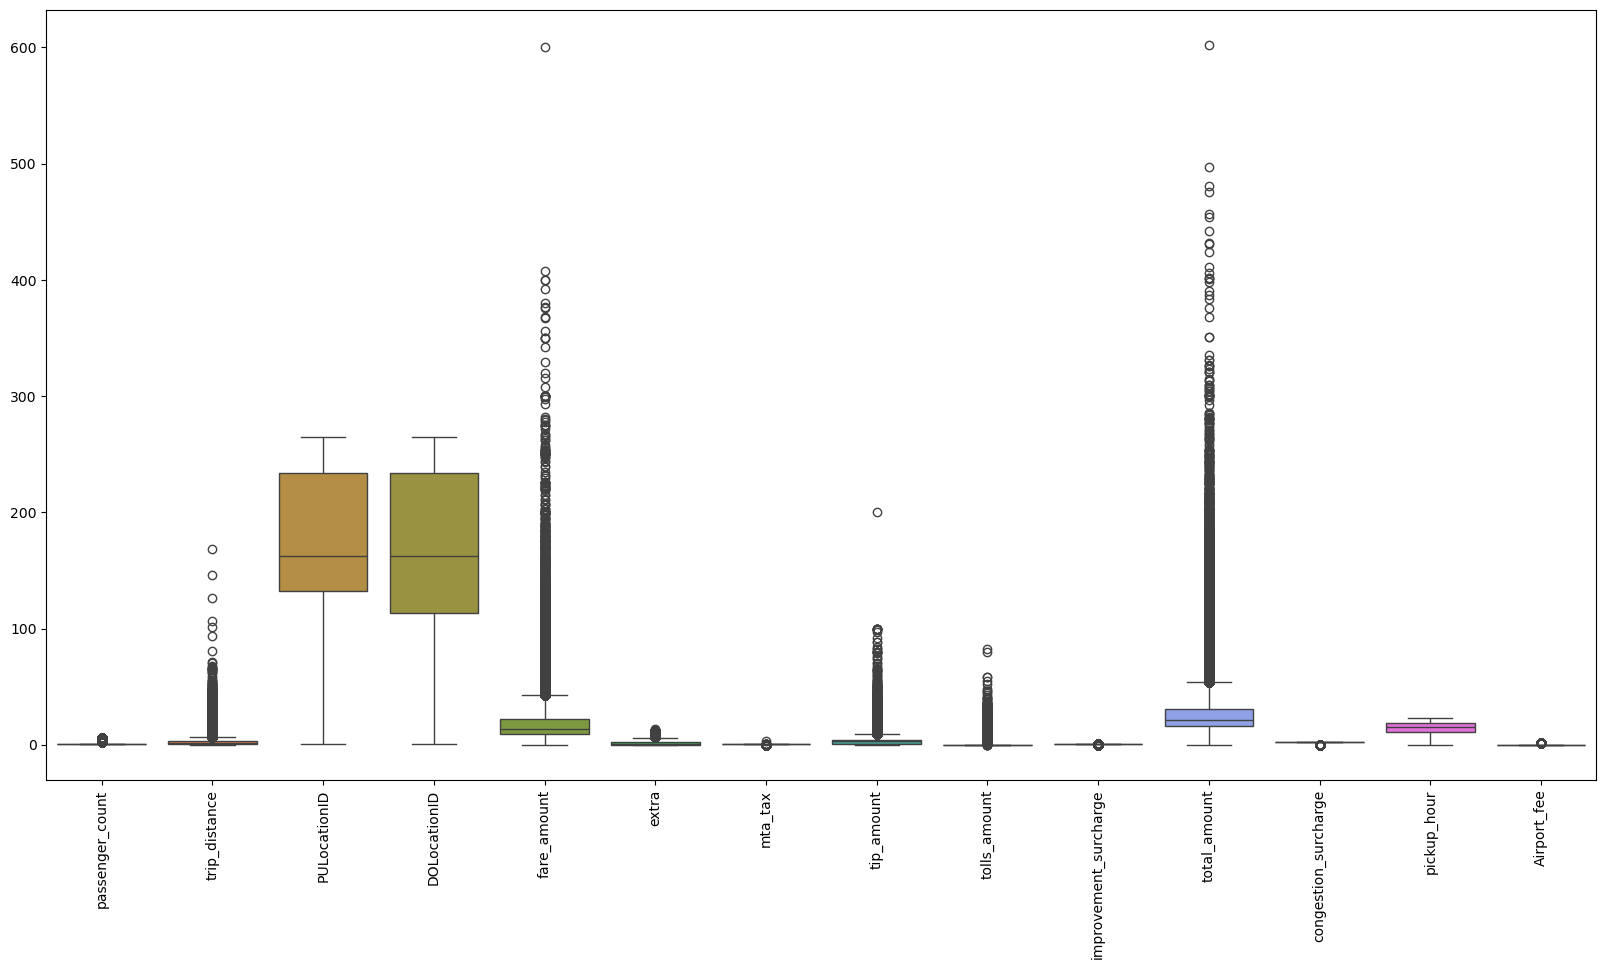

In [7]:
# create a box plot for all columns to check for outliers

# Create a boxplot for all columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=90)
plt.show()

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

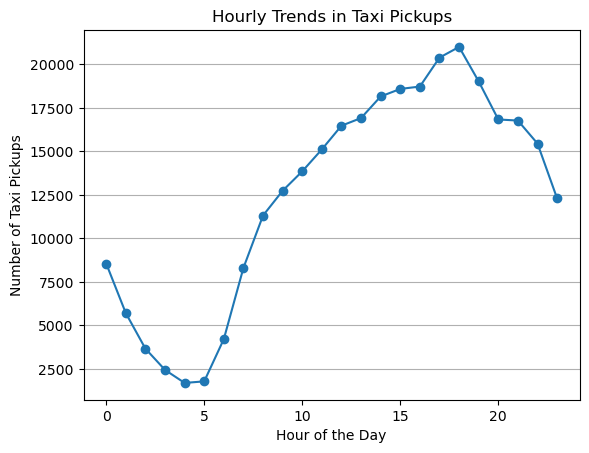

In [ ]:
# Find and show the hourly trends in taxi pickups

# This can be done based on 'pickup_hour' column already available in dataset. We can Group by 'pickup_hour' and calculate the count of trips in each hour

taxi_hourly_trends = df_no_outliers.groupby('pickup_hour').size() # Count the number of trips in each hour

plt.plot(taxi_hourly_trends.index, taxi_hourly_trends.values, marker='o')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Pickups')
plt.grid(axis='y')
plt.show()



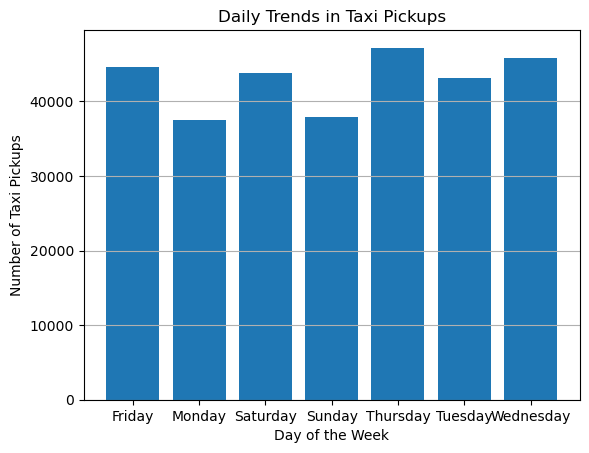

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the day of the week from 'pickup_date' and group by it to calculate the count of trips on each day

df_no_outliers['pickup_date'] = pd.to_datetime(df_no_outliers['pickup_date']) # Convert 'pickup_date' to datetime format
df_no_outliers['day_of_week'] = df_no_outliers['pickup_date'].dt.day_name() # Extract the day of the week

# Group by 'day_of_week' and calculate the count of trips on each day
trip_counts_by_day = df_no_outliers.groupby('day_of_week').size()

plt.bar(trip_counts_by_day.index, trip_counts_by_day.values)
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Taxi Pickups')
plt.grid(axis='y')
plt.show()
###1.	The taxi demand is highest on Thursdays closely followed by Wednesdays
###2.	The lowest demand is on Mondays and Sundays.


In [ ]:
# Show the monthly trends in pickups

# This can be done based on 'tpep_pickup_datetime' column. Group by month and calculate the count of trips every month

pickup_datetime = df_no_outliers['tpep_pickup_datetime']

# Extract datetime values in months 
pickup_months = pickup_datetime.dt.to_period('M')

# Group the data by the month as the ask is to show monthly trends
grouped_by_month = df_no_outliers.groupby(pickup_months)

monthly_trends = grouped_by_month.size()

plt.plot(monthly_trends.index.to_timestamp(), monthly_trends.values, marker='o')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Taxi Pickups')
plt.grid(axis='y')
plt.show()

## Monthly Trends in Taxi Pickups: The number of taxi pickups are high during the month of May-June and Nov. And lowest during the month of Aug-Sept. This could be due to various reasons like Aug-June is summers and school holidays
### and Nov is festive season

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [101]:
# Analyse the above parameters

# Check for zero/negative values in 'fare_amount', 'tip_amount', 'total_amount', and 'trip_distance'

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
financial_columns1 = ['fare_amount', 'total_amount', 'trip_distance']

# Check for zero/negative values in the financial columns
zero_neg_values = df_no_outliers[financial_columns].apply(lambda x: (x <= 0).sum())
print(zero_neg_values)
print(df_no_outliers.shape)

### Yes, there are zero/negative values in 'fare_amount', 'tip_amount', 'total_amount', and 'trip_distance' columns. 

fare_amount         88
tip_amount       68696
total_amount        49
trip_distance     5731
dtype: int64
(299951, 22)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [102]:
# Create a df with non zero entries for the selected parameters.

### There are no negative values in the financial columns. But there are zero values in 'fare_amount', 'tip_amount', 'total_amount', and 'trip_distance'.
### Out of this tip_amount is inconsequential as it can be zero in case of no tip. But fare_amount, total_amount, and trip_distance cannot be zero.
### so we can create a copy dataframe leaving out the zero values from these columns.

# Create a copy of the dataframe leaving out the zero values from 'fare_amount', 'total_amount', and 'trip_distance'

df_no_negative_and_zeros = df_no_outliers[(df_no_outliers['fare_amount'] > 0) & (df_no_outliers['total_amount'] > 0) & (df_no_outliers['trip_distance'] > 0)]

df_no_negative_and_zeros.shape

(294181, 22)

In [12]:
df_no_negative_and_zeros.to_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_no_negative_and_zeros_3L.csv",index=False)

In [60]:
df_no_negative_and_zeros = pd.read_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_no_negative_and_zeros_3L.csv")

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [61]:
# Standardise 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format
df_no_negative_and_zeros['tpep_pickup_datetime'] = pd.to_datetime(df_no_negative_and_zeros['tpep_pickup_datetime'])
df_no_negative_and_zeros['tpep_dropoff_datetime'] = pd.to_datetime(df_no_negative_and_zeros['tpep_dropoff_datetime'])

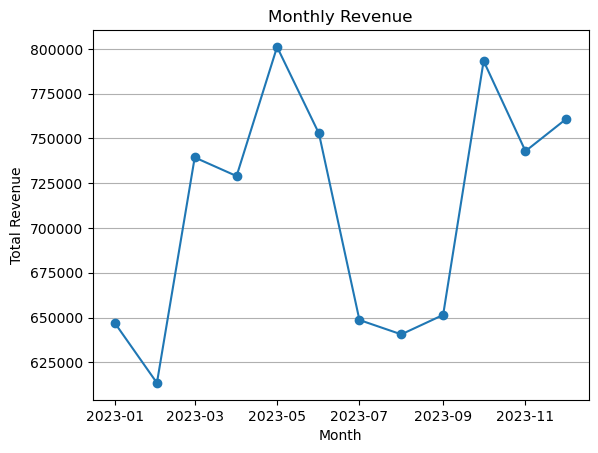

In [ ]:
# Group data by month and analyse monthly revenue

# Group data by month and calculate the total revenue for each month
months = df_no_negative_and_zeros.groupby(df_no_negative_and_zeros['tpep_pickup_datetime'].dt.to_period('M'))

month_revenue = months['total_amount'].sum()

plt.plot(month_revenue.index.to_timestamp(), month_revenue.values, marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.show()

###  plot shows the monthly revenue. The revenue is high during the month of May-June and Nov. And lowest during the month of Oct-Sept.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

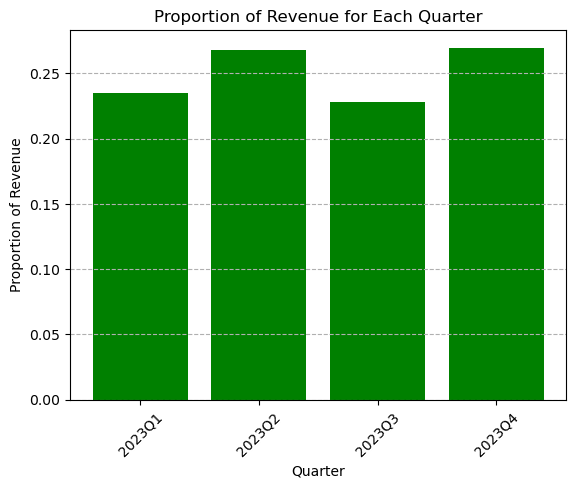

In [ ]:
# Calculate proportion of each quarter

# Group data by quarter and calculate the total revenue for each quarter
quarter = df_no_negative_and_zeros.groupby(df_no_negative_and_zeros['tpep_pickup_datetime'].dt.to_period('Q'))

quarterly_revenue = quarter['total_amount'].sum()

# Calculate the average proportion of each quarter
quarter_proportion = quarterly_revenue / quarterly_revenue.sum()

plt.bar(quarterly_revenue.index.astype(str), quarter_proportion.values, color='green')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Revenue')
plt.title('Proportion of Revenue for Each Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

### plot shows the proportion of revenue for each quarter. The revenue is highest in Q2 & Q4 and lower in Q1 & Q3.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

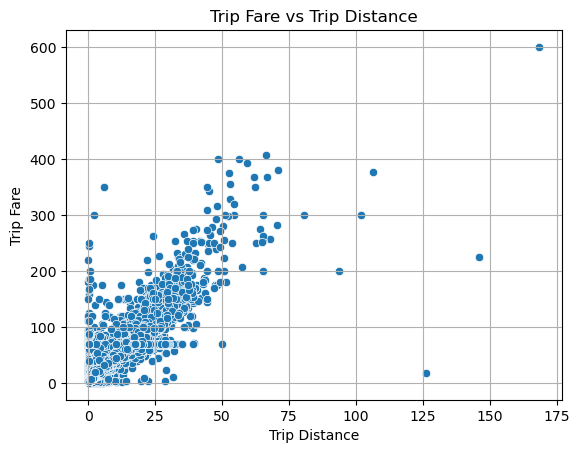

Correlation between 'trip_distance' and 'fare_amount': 0.9425552333669934


In [67]:
# Show how trip fare is affected by distance


sns.scatterplot(x='trip_distance', y='fare_amount', data=df_no_negative_and_zeros)
plt.title('Trip Fare vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Trip Fare')
plt.grid(axis='both')
plt.show()

# correlation between 'trip_distance' and 'fare_amount'
correlation = df_no_negative_and_zeros['trip_distance'].corr(df_no_negative_and_zeros['fare_amount'])
print(f"Correlation between 'trip_distance' and 'fare_amount': {correlation}")

### The scatter plot shows that there is a positive correlation between 'trip_distance' and 'fare_amount'. This is obvious as longer trips lead to more taxi fare.


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

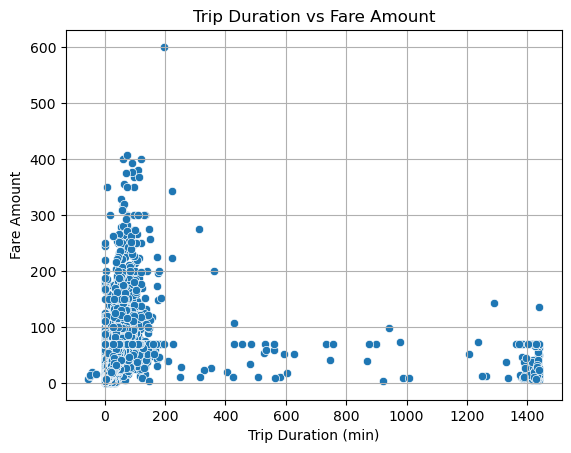

Correlation between 'trip_duration' and 'fare_amount': 0.2764258306749065


In [65]:
# Show relationship between fare and trip duration

# Calculate the trip duration in minutes
df_no_negative_and_zeros['trip_duration'] = (df_no_negative_and_zeros['tpep_dropoff_datetime'] - df_no_negative_and_zeros['tpep_pickup_datetime']).dt.total_seconds() / 60


sns.scatterplot(x='trip_duration', y='fare_amount', data=df_no_negative_and_zeros)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Fare Amount')
plt.grid(axis='both')
plt.show()      

# correlation between 'trip_duration' and 'fare_amount'
correlation = df_no_negative_and_zeros['trip_duration'].corr(df_no_negative_and_zeros['fare_amount'])
print(f"Correlation between 'trip_duration' and 'fare_amount': {correlation}")

### The scatter plot shows that there is a negative correlation between 'trip_duration' and 'fare_amount'. This is unusual as longer trips should lead to more taxi fare.
### This could be due to various reasons such as traffic conditions, route taken, wait time  etc.

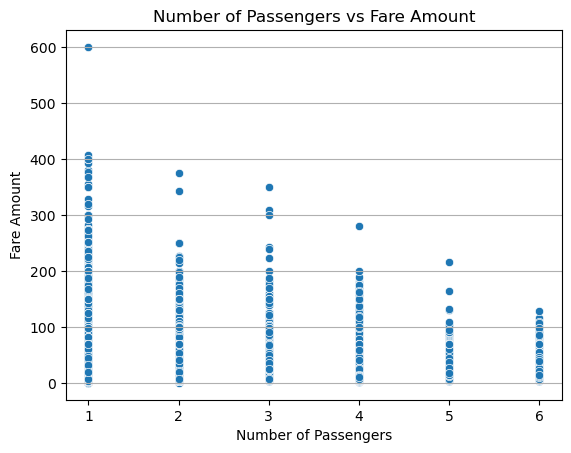

Correlation between 'passenger_count' and 'fare_amount': 0.03908010851842424


In [66]:
# Show relationship between fare and number of passengers


sns.scatterplot(x='passenger_count', y='fare_amount', data=df_no_negative_and_zeros)
plt.title('Number of Passengers vs Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(axis='y')
plt.show()

# correlation between 'passenger_count' and 'fare_amount'
correlation = df_no_negative_and_zeros['passenger_count'].corr(df_no_negative_and_zeros['fare_amount'])
print(f"Correlation between 'passenger_count' and 'fare_amount': {correlation}")

### The boxplot shows that there is no significant relationship between 'passenger_count' and 'fare_amount'. This is expected as the number of passengers should not affect the taxi fare.


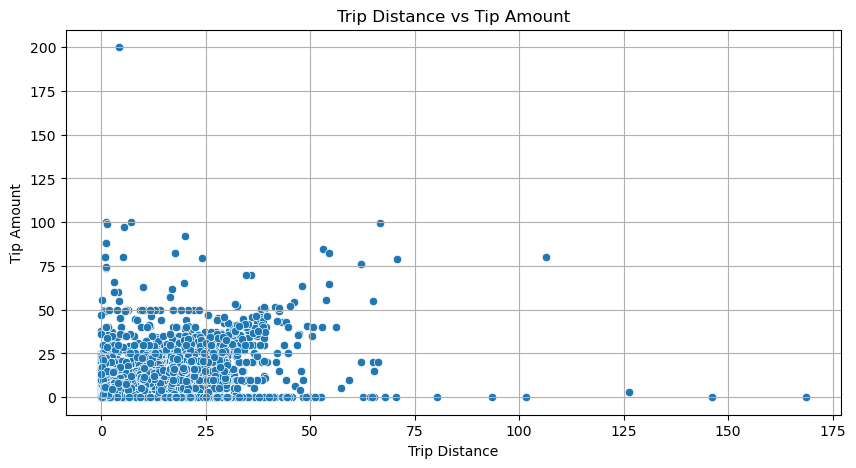

Correlation between 'trip_distance' and 'tip_amount': 0.5896057645102559


In [ ]:
# Show relationship between tip and trip distance


sns.scatterplot(x='trip_distance', y='tip_amount', data=df_no_negative_and_zeros)
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.grid(axis='both')
plt.show()

# correlation between 'trip_distance' and 'tip_amount'
correlation = df_no_negative_and_zeros['trip_distance'].corr(df_no_negative_and_zeros['tip_amount'])
print(f"Correlation between 'trip_distance' and 'tip_amount': {correlation}")

### The scatter plot shows that there is a positive correlation between 'trip_distance' and 'tip_amount'. This is expected as longer trips may lead to more tip amount.

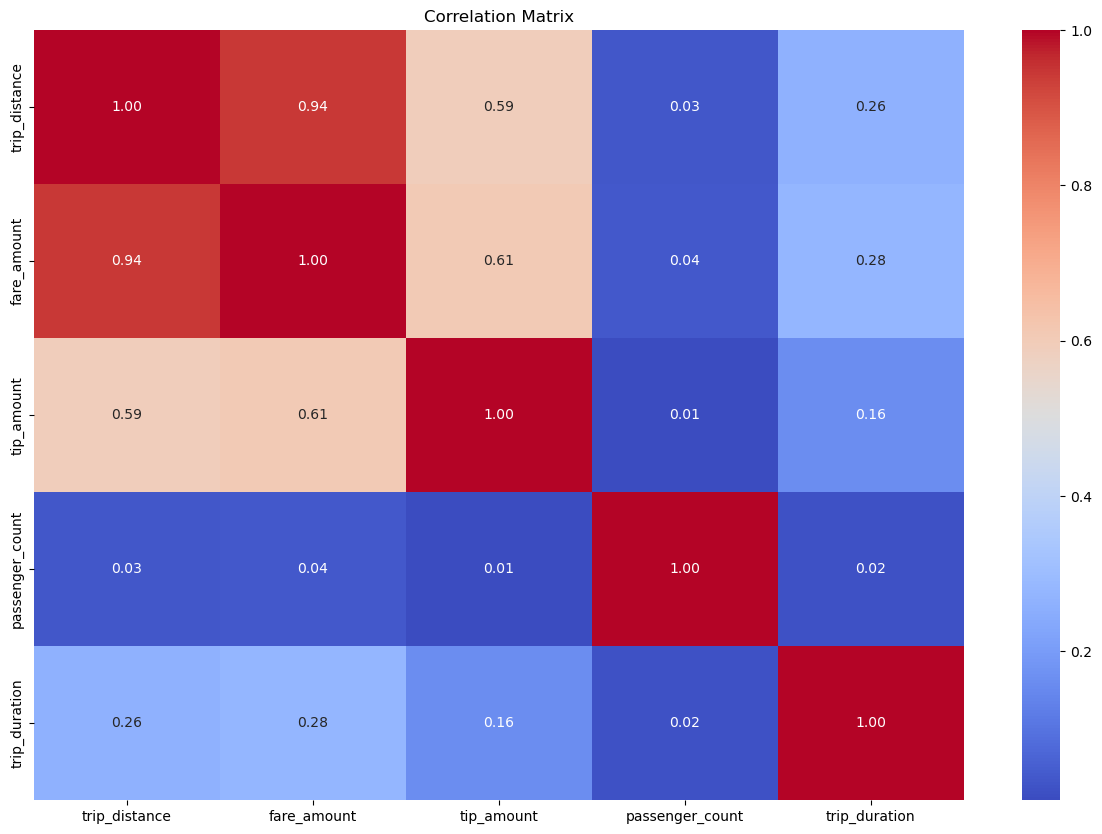

In [ ]:
# Create a heatmap to show the correlation between the numerical columns

# Calculate the correlation matrix
correlation_matrix = df_no_negative_and_zeros[['trip_distance','fare_amount', 'tip_amount', 'passenger_count', 'trip_duration']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### The heatmap shows the correlation between the numerical columns. The correlation values range from -1 to 1. 
### A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).

# Group data by 'payment_type' and calculate the count of trips for each payment type
payment_type_distribution = df_no_negative_and_zeros.groupby('payment_type').size()

# Plot the distribution of different payment types
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_type', data=df_no_negative_and_zeros)
plt.title('Distribution of Different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()

### The bar plot shows the distribution of different payment types. The most common payment type is 'Credit Card' followed by 'Cash' and 'No Charge'.

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [5]:
import geopandas as gpd
print(gpd.__version__)

1.0.1


In [6]:
# import geopandas as gpd

# Read the shapefile using geopandas

zones = gpd.read_file('D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//taxi_zones//taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

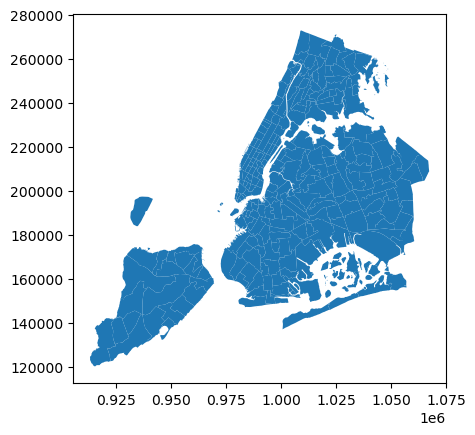

In [7]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [7]:
# Merge zones and trip records using locationID and PULocationID

# Merge the 'zones' and 'df_no_negative_and_zeros' dataframes using 'LocationID' and 'PULocationID'
# Left join is appropriate here because every trip is important and attach corresponding zone locationid. It may happen that certain trips may not have valid zone data.
# But still the trip data should be retained in new dataframe. Hence the left join is appropriate.

df_merged = pd.merge(df_no_negative_and_zeros, zones, left_on='PULocationID', right_on='LocationID', how='left')

df_merged.head()

df_merged.shape

df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294193 entries, 0 to 294192
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   VendorID               294193 non-null  int64   
 1   tpep_pickup_datetime   294193 non-null  object  
 2   tpep_dropoff_datetime  294193 non-null  object  
 3   passenger_count        294193 non-null  float64 
 4   trip_distance          294193 non-null  float64 
 5   RatecodeID             294193 non-null  float64 
 6   store_and_fwd_flag     294193 non-null  object  
 7   PULocationID           294193 non-null  int64   
 8   DOLocationID           294193 non-null  int64   
 9   payment_type           294193 non-null  int64   
 10  fare_amount            294193 non-null  float64 
 11  extra                  294193 non-null  float64 
 12  mta_tax                294193 non-null  float64 
 13  tip_amount             294193 non-null  float64 
 14  tolls_amount        

In [ ]:
df_merged.to_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_merged_3L.csv",index=False)

In [38]:
df_merged_new = pd.read_csv("D://UpGrad Sessions//AI-ML Course//SQL//EDA Assignment//Datasets and Dictionary//combined_data_merged_3L.csv")

df_merged_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-02 18:54:59   2023-10-02 19:04:20              1.0   
1         2  2023-01-10 14:03:07   2023-01-10 14:12:50              1.0   
2         2  2023-07-11 20:31:00   2023-07-11 20:46:31              1.0   
3         2  2023-04-07 22:15:33   2023-04-07 22:44:59              1.0   
4         1  2023-12-08 15:24:45   2023-12-08 15:37:23              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.10         1.0                  N            90           163   
1           1.02         1.0                  N           237           161   
2           2.63         1.0                  N           140           238   
3           6.15         1.0                  N           114            41   
4           0.90         1.0                  N           237           162   

   payment_type  ...  pickup_date  pickup_hour  Airport_fee  OBJECTID  \
0             1  ...   2023-10-02           18          0.0      90.0   
1             1  ...   2023-01-10           14          0.0     237.0   
2             1  ...   2023-07-11           20          0.0     140.0   
3             1  ...   2023-04-07           22          0.0     114.0   
4             1  ...   2023-12-08           15          0.0     237.0   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.030759    0.000055                 Flatiron        90.0  Manhattan   
1    0.042213    0.000096    Upper East Side South       237.0  Manhattan   
2    0.047584    0.000114          Lenox Hill East       140.0  Manhattan   
3    0.031727    0.000047  Greenwich Village South       114.0  Manhattan   
4    0.042213    0.000096    Upper East Side South       237.0  Manhattan   

                                            geometry  
0  POLYGON ((985265.1291738749 208165.86342927814...  
1  POLYGON ((993633.4421878606 216961.01610207558...  
2  POLYGON ((995735.0624100119 215619.8353998661,...  
3  POLYGON ((986306.7117828578 203122.78622178733...  
4  POLYGON ((993633.4421878606 216961.01610207558...  

[5 rows x 28 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

trips_count_per_location = df_merged_new.groupby('LocationID').size().reset_index(name='Number_of_Trips') # Count the number of trips for each location .reset_index(name='Number_of_Trips') is used to rename the column

# Merge the 'zones' and 'location_trips' dataframes using 'LocationID' and 'LocationID' as both dataset contain 'LocationID'
merged_by_zones = pd.merge(zones, trips_count_per_location, left_on='LocationID', right_on='LocationID', how='left') # Left join to retain all zones

# Fill NaN values with 0 to reduce the number of missing values
merged_by_zones['Number_of_Trips'] = merged_by_zones['Number_of_Trips'].fillna(0) 

# Calculate Number of trips per location id
merged_by_zones['Number_of_Trips'] = merged_by_zones['Number_of_Trips']

merged_by_zones.head()

# Count of trips per location
merged_by_zones['Number_of_Trips'].value_counts()

# Since the count data is huge lets try to depict using a graph

plt.figure(figsize=(10, 10))
plt.bar(merged_by_zones['LocationID'], merged_by_zones['Number_of_Trips'], width=1.0)   
plt.title('Number of Trips per Location')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()


### From graph is evident that highest no of trips are from location id 130 to 150 and 230 to 240
### The lowest no of trips are from location id 1 to 10 and 250 to 260


OBJECTID  Shape_Leng  Shape_Area                                 zone  \
127       128    0.070209    0.000207                     Inwood Hill Park   
72         73    0.085302    0.000292                        East Flushing   
26         27    0.202509    0.001341  Breezy Point/Fort Tilden/Riis Beach   
7           8    0.027591    0.000027                         Astoria Park   
117       118    0.243966    0.001827          Heartland Village/Todt Hill   
43         44    0.235689    0.001945               Charleston/Tottenville   
95         96    0.185180    0.000548            Forest Park/Highland Park   
250       251    0.137711    0.000626                          Westerleigh   
177       178    0.068253    0.000176                  Ocean Parkway South   
15         16    0.141292    0.000872                              Bayside   

     LocationID        borough  \
127         128      Manhattan   
72           73         Queens   
26           27         Queens   
7             8         Queens   
117         118  Staten Island   
43           44  Staten Island   
95           96         Queens   
250         251  Staten Island   
177         178       Brooklyn   
15           16         Queens   

                                              geometry  Number_of_Trips  
127  MULTIPOLYGON (((1005378.119 259493.528, 100537...              1.0  
72   POLYGON ((1040865.308 212673.974, 1040649.312 ...              1.0  
26   POLYGON ((1021692.969 147138.664, 1021883.624 ...              1.0  
7    POLYGON ((1005482.276 221686.466, 1005304.898 ...              1.0  
117  POLYGON ((954167.794 161619.974, 954322.65 161...              1.0  
43   POLYGON ((925284.273 142075.259, 924921.951 14...              1.0  
95   POLYGON ((1029152.314 197379.274, 1029238.052 ...              1.0  
250  POLYGON ((947868.004 169247.734, 948000.981 16...              1.0  
177  POLYGON ((992354.462 167321.878, 992446.939 16...              1.0  
15   POLYGON ((1048344.039 223210.621, 1048409.575 ...              1.0

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

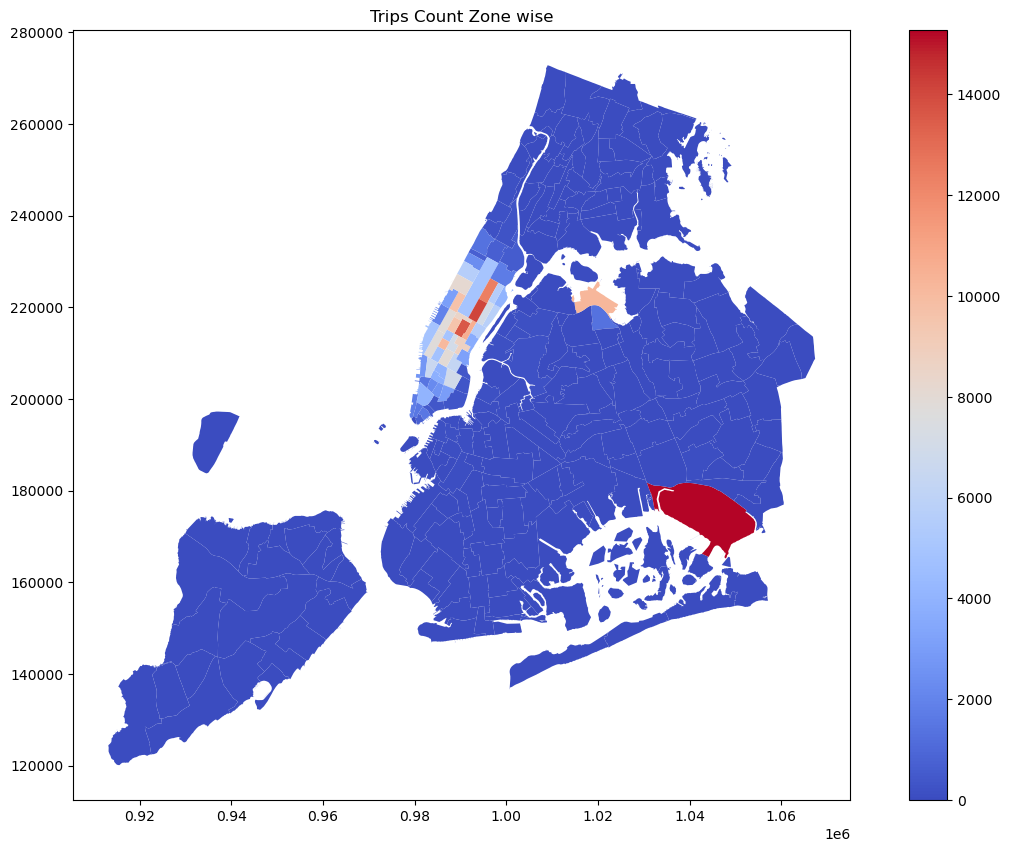

In [68]:
# Merge trip counts back to the zones GeoDataFrame

merged_by_zones.plot(column='Number_of_Trips', cmap='coolwarm', legend=True, figsize=(15, 10))
plt.title('Trips Count Zone wise')
plt.show()

###1. The plot shows the number of trips per location. The colour intensity indicates the number of trips. The dark red colour shows the highest trips, as we move towards cool colour of blue the trips decrease.
###2. The highest number of trips are from location id 130 to 160 and 230 to 240.
###3. The lowest number of trips are shown in above second table. All have 1 trip. 
###4. The number of trips is higher in the central part of the city compared to the outskirts


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged_by_zones.plot(column='Number_of_Trips', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Trips Count Zone wise')
plt.axis('off')
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the 'merged_by_zones' dataframe by 'Number_of_Trips' in descending order
zones_sorted = merged_by_zones.sort_values(by='Number_of_Trips', ascending=False)

zones_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     Number_of_Trips  
131            15275  
236            14132  
160            13599  
235            12391  
161            10618

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
##### ToDO Revisit the solution
# Find routes which have the slowest speeds at different times of the day

# Convert 'tpep_pickup_datetime' to datetime format
df_merged_new['tpep_pickup_datetime'] = pd.to_datetime(df_merged_new['tpep_pickup_datetime'])

# Calculate the trip duration in minutes
df_merged_new['trip_duration'] = (pd.to_datetime(df_merged_new['tpep_dropoff_datetime']) - df_merged_new['tpep_pickup_datetime']).dt.total_seconds() / 60 # Calculate the trip duration in minutes

# filter trips with zero or -ve durations if any to avoid any issues
df_merged_new = df_merged_new[df_merged_new['trip_duration'] > 0]

# Calculate the average trip duration for each hour of the day
df_merged_new['pickup_hour'] = df_merged_new['tpep_pickup_datetime'].dt.hour 

# Calculate the average trip duration for each hour of the day
average_trip_duration = df_merged_new.groupby('pickup_hour')['trip_duration'].mean()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [36]:
# Visualise the number of trips per hour and find the busiest hour

# Calculate the number of trips at each hour of the day
trips_per_hour = df_merged_new.groupby('pickup_hour').size()

# Find the busiest hour
max_busiest_hour = trips_per_hour.idxmax() # Find the hour with the maximum number of trips
max_trips = trips_per_hour.max() # Find the maximum number of trips


plt.bar(trips_per_hour.index, trips_per_hour.values)
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day in 24-hour format')
plt.ylabel('Number of Trips')
plt.show()

print(f"The busiest hour is {max_busiest_hour} with {max_trips} trips.") # Print the busiest hour


The busiest hour is 18 with 20619 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

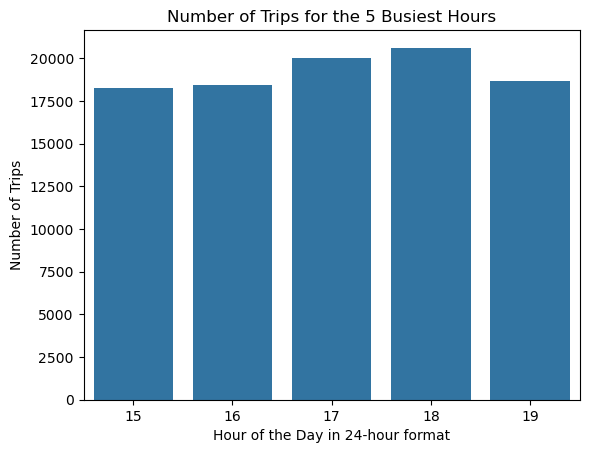

top 5 busiest hour and their corresponding trips are <bound method Series.sort_values of pickup_hour
18    20619
17    19995
19    18692
16    18418
15    18267
dtype: int64>


In [ ]:
# Scale up the number of trips

### Already we are deriving data on whole set of df_merged_new. I don't know what scaling needs to be done here.

max_busy_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()

# Find actual number of trips in 5 busiest hours
top_5_hours = trips_per_hour.nlargest(5)
#top_5_hours

sns.barplot(x=top_5_hours.index, y=top_5_hours.values)
plt.title('Number of Trips for the 5 Busiest Hours')
plt.xlabel('Hour of the Day in 24-hour format')
plt.ylabel('Number of Trips')
plt.show()

print("top 5 busiest hour and their corresponding trips are", top_5_hours.sort_values)

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

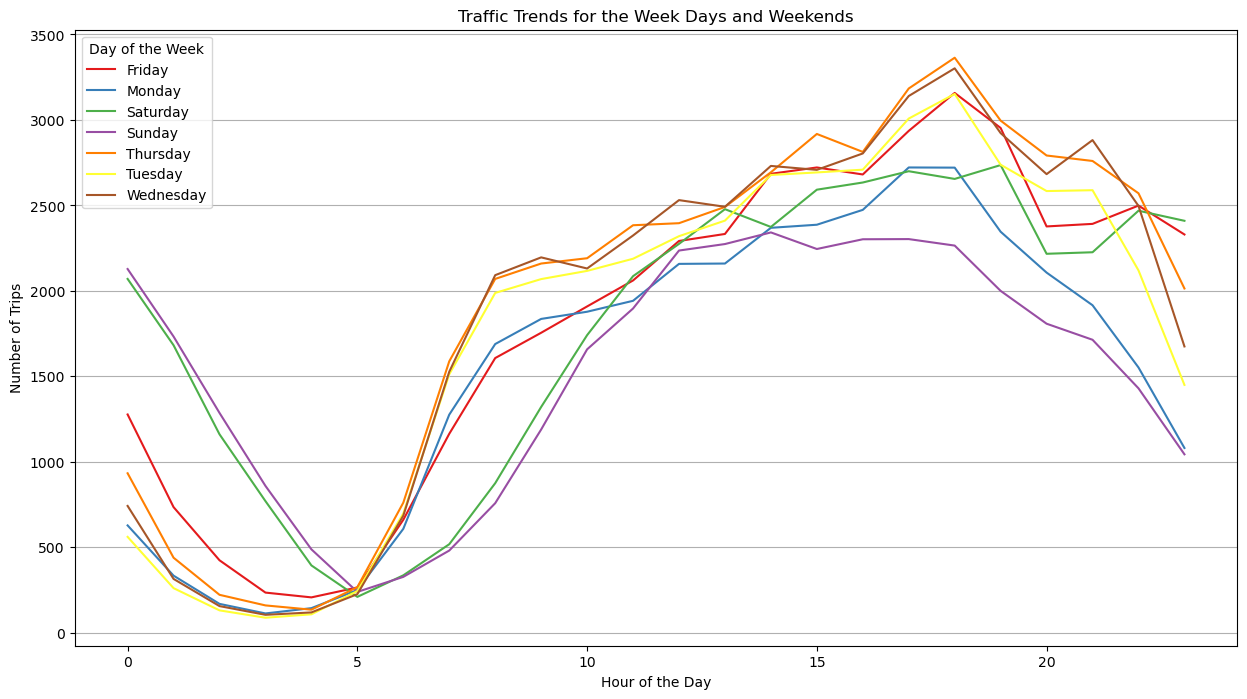

In [ ]:
# Compare traffic trends for the week days and weekends
### Traffic pattern would mean number of taxis on road at a given time. This can be analysed by grouping the data by day of the week and hour of the day and calculating the number of trips.

# Extract the day of the week from 'pickup_date'
df_merged_new['week_day'] = df_merged_new['tpep_pickup_datetime'].dt.day_name()

# Group by 'week_day' and 'pickup_hour' and calculate the number of trips
traffic_pattern = df_merged_new.groupby(['week_day', 'pickup_hour']).size().reset_index() # Count the number of trips for each day of the week and hour
traffic_pattern['Num_of_Trips'] = traffic_pattern[0]

# Plot the traffic trends for the week days and weekends
plt.figure(figsize=(15, 8))
sns.lineplot(data=traffic_pattern, x='pickup_hour', y='Num_of_Trips', hue='week_day', palette='Set1')
plt.title('Traffic Trends for the Week Days and Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day of the Week')
plt.grid(axis='y')
plt.show()

###1. above graph shows that the traffic trends are different for weekdays and weekends. The number of trips are high during evening hours on weekdays and during afternoon hours on weekends.
###2. This is expected as people are more likely to travel during evening hours on weekdays for various reasons such as returning home from work, going out for dinner, etc.
###3. Hours with minimum activity are early morning hours on weekdays and late night hours on weekends.
###4. Hours with biggest difference in traffic trends are 5-6 PM on weekdays and 2-3 PM on weekends.
###5. One interesting trend is seen in Saturdays where the demand shoots up a bit after 8PM till late night. This may be indication of people going out for parties/malls/restaurants etc and hailing cab services for travelling.
###6. Busy and quiet hours will help in planning the taxi services better. For example, more taxis can be deployed during busy hours and fewer taxis can be deployed during quiet hours to optimize the service.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

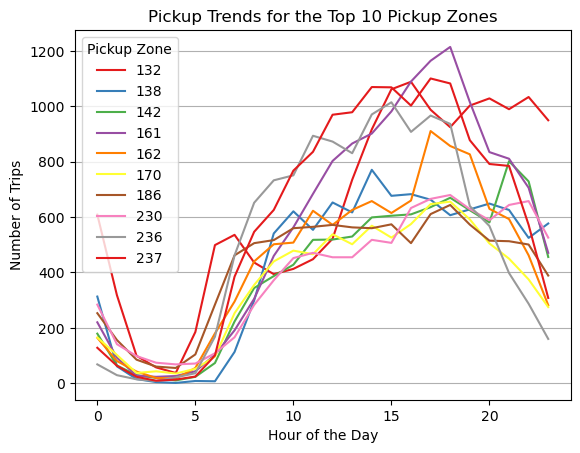

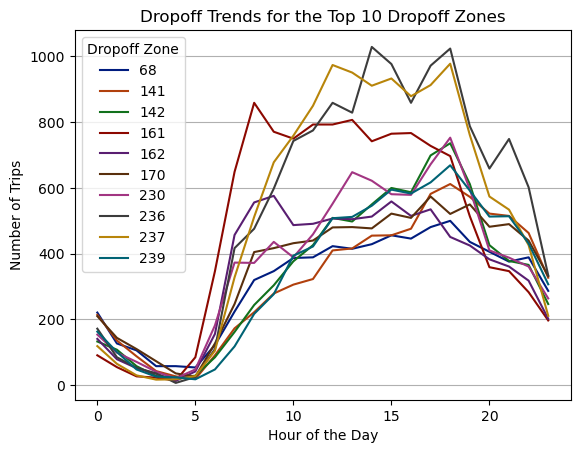

      PULocationID  pickup_hour  Number_of_Trips
1454           132            0              609
1455           132            1              318
1456           132            2               99
1457           132            3               57
1458           132            4               37


DOLocationID  pickup_hour  Number_of_Trips
1169            68            0              221
1170            68            1              127
1171            68            2              106
1172            68            3               58
1173            68            4               58

In [ ]:
# Find top 10 pickup and dropoff zones

# Group data by 'PULocationID' and 'pickup_hour' and calculate the number of trips for each zone and hour
pickup_zones = df_merged_new.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='Number_of_Trips') # Count the number of trips for each zone and hour

# Find the top 10 pickup zones
top_10_pickup_zones = pickup_zones.groupby('PULocationID')['Number_of_Trips'].sum().nlargest(10).index # Find the top 10 pickup zones based on the total number of trips

# Filter the data for the top 10 pickup zones by searching for PuLocationID in top 10 pickup zones. Using the funtion 'isin' which helps to filter data based on input values
top_10_pickup_zones_new = pickup_zones[pickup_zones['PULocationID'].isin(top_10_pickup_zones)]

sns.lineplot(data=top_10_pickup_zones_new, x='pickup_hour', y='Number_of_Trips', hue='PULocationID', palette='Set1')
plt.title('Pickup Trends for the Top 10 Pickup Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Pickup Zone')
plt.grid(axis='y')
plt.show()

# Group data by 'DOLocationID' and 'pickup_hour' and calculate the number of trips for each zone and hour
dropoff_zones = df_merged_new.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='Number_of_Trips') # Count the number of trips for each zone and hour

# Find the top 10 dropoff zones
top_10_dropoff_zones = dropoff_zones.groupby('DOLocationID')['Number_of_Trips'].sum().nlargest(10).index # Find the top 10 dropoff zones based on the total number

# Filter the data for the top 10 dropoff zones
top_10_dropoff_zones_new = dropoff_zones[dropoff_zones['DOLocationID'].isin(top_10_dropoff_zones)]

sns.lineplot(data=top_10_dropoff_zones_new, x='pickup_hour', y='Number_of_Trips', hue='DOLocationID', palette='dark')
plt.title('Dropoff Trends for the Top 10 Dropoff Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Dropoff Zone')
plt.grid(axis='y')
plt.show()

### Graph Analysis
### The line plots show the pickup and dropoff trends for the top 10 zones with high hourly pickups and dropoffs. The trends show the number of trips for each zone at different hours of the day.
### The trends help in understanding the traffic patterns for each zone and the busiest hours for pickups and dropoffs. This information can be useful for planning taxi services and optimizing the service based on the demand.
###Daily Trend:

###The number of trips is low in the early morning hours (0-5 AM).
###A sharp increase begins around 6-7 AM, suggesting the start of morning commute hours.
###The number of trips steadily increases until peaking in the afternoon/evening (typically between 15-19 hours).
###After this peak, there is a gradual decline towards late evening and night.
###Peak Hours:

###The highest activity occurs between 15:00 to 19:00 hours, indicating a strong evening rush.
###The pickup zones show different peak levels, with some zones exceeding 1200 trips at peak.
###Variations Among Pickup Zones:

###Some pickup zones (e.g., Zone 132, 237) exhibit significantly higher activity compared to others.
###The number of trips in these zones can be 2-3 times higher than the average.
###Late Night and Early Morning:

###The number of pickups drops significantly after 21:00.
###The lowest activity is between 2 AM - 5 AM, suggesting minimal demand during those hours.


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

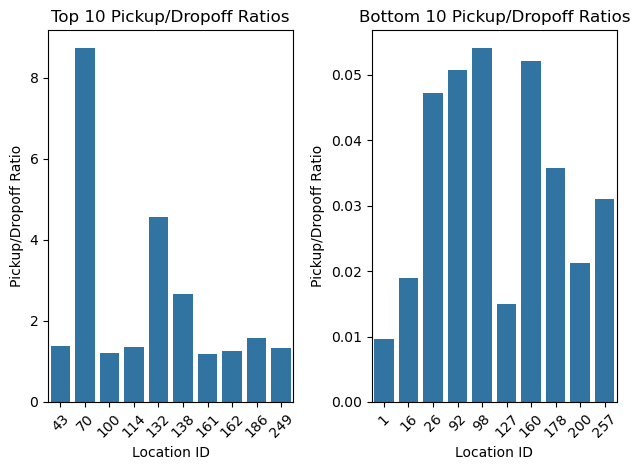

In [20]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate the number of pickups and dropoffs for each zone
pickup_total = df_merged_new.groupby('PULocationID').size().reset_index(name='Pickup_Count') # Count the number of pickups for each zone
dropoff_total = df_merged_new.groupby('DOLocationID').size().reset_index(name='Dropoff_Count') # Count the number of dropoffs

# Merge the pickup and dropoff counts based on the location ID columns and inner join to retain only common zones
pickup_dropoff_counts = pd.merge(pickup_total, dropoff_total, left_on='PULocationID', right_on='DOLocationID', how='inner') 

# Calculate the pickup/dropoff ratio zone wise
pickup_dropoff_counts['Pick_Drop_Ratio'] = pickup_dropoff_counts['Pickup_Count'] / pickup_dropoff_counts['Dropoff_Count'] # Calculate the pickup/dropoff ratio

pickup_dropoff_counts_sorted = pickup_dropoff_counts.sort_values(by='Pick_Drop_Ratio', ascending=False)

#print(pickup_dropoff_counts_sorted.head(10))
#print(pickup_dropoff_counts_sorted.tail(10))
#print('------------------------------')

plt.subplot(1, 2, 1)
sns.barplot(pickup_dropoff_counts_sorted.head(10), x='PULocationID', y='Pick_Drop_Ratio')
plt.title('Top 10 Pickup/Dropoff Ratios')
plt.xlabel('Location ID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(pickup_dropoff_counts_sorted.tail(10), x='PULocationID', y='Pick_Drop_Ratio')
plt.title('Bottom 10 Pickup/Dropoff Ratios')
plt.xlabel('Location ID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### The bar plots show the top 10 and bottom 10 pickup/dropoff ratios for different zones. The pickup/dropoff ratio indicates the ratio of pickups to dropoffs in each zone.
### From the gra[h below, location id 70 has the highest pickup/dropoff ratio, while location id 160    has the lowest pickup/dropoff ratio.
### The pickup/dropoff ratio can help in understanding the demand for taxi services in different zones and optimizing the service based on the demand.


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

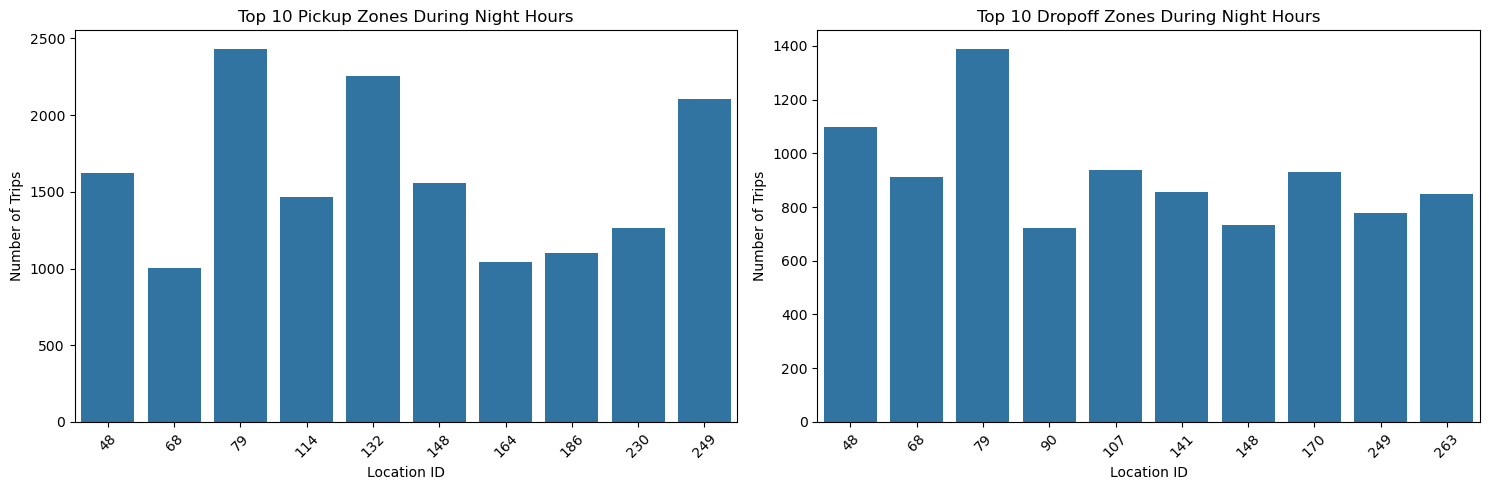

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# night hours is identified as time between (11 PM to 5 AM)
night_hours_data23_5 = df_merged_new[(df_merged_new['pickup_hour'] >= 23) | (df_merged_new['pickup_hour'] <= 5)]

# Group data by 'PULocationID' and calculate the number of trips for each zone
night_pickup_zones = night_hours_data23_5.groupby('PULocationID').size().reset_index(name='Num_of_Trips') # Count the number of trips for each zone

# Find the top 10 pickup zones during night hours by taking the 10 largest values
top_10_night_pickup_zones = night_pickup_zones.nlargest(10, 'Num_of_Trips') # Find the top 10 pickup

# Group data by 'DOLocationID' and calculate the number of trips for each zone
night_dropoff_zones = night_hours_data23_5.groupby('DOLocationID').size().reset_index(name='Num_of_Trips') # Count the number of trips for each zone

# Find the top 10 dropoff zones during night hours by taking the 10 largest values
top_10_night_dropoff_zones = night_dropoff_zones.nlargest(10, 'Num_of_Trips') # Find the top 10 dropoff zones

# Plot subplots to have a better comparison side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_night_pickup_zones, x='PULocationID', y='Num_of_Trips')
plt.title('Top 10 Pickup Zones During Night Hours')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=top_10_night_dropoff_zones, x='DOLocationID', y='Num_of_Trips')
plt.title('Top 10 Dropoff Zones During Night Hours')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### The bar plots show the top 10 pickup and dropoff zones during night hours (11 PM to 5 AM). The zones with the highest number of trips during night hours are identified.
### Top highest pickup zone is 79 and highest dropoff zone is 79. This indicates that zone 79 is the most active zone during night hours for both pickups and dropoffs.
### The top zones during night hours may have different characteristics compared to the overall top zones, such as being closer to nightlife spots, residential areas, etc.
### This information can be useful for planning taxi services during night hours and optimizing the service based on the demand.

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

# night hours is identified as time between (11 PM to 5 AM)
night_hours_data23_5 = df_merged_new[(df_merged_new['pickup_hour'] >= 23) | (df_merged_new['pickup_hour'] <= 5)]

# Calculate the total revenue for night hours by taking sum of total_amount columnbetweeb 11pm to 5am
night_revenue = night_hours_data23_5['total_amount'].sum()

# Calculate the total revenue for daytime hours by taking sum of total_amount - night_revenue
daytime_revenue = df_merged_new['total_amount'].sum() - night_revenue

# Calculate the revenue share for night hours from total of 24 hours by summing the total_amounts column
night_rev_share = (night_revenue / df_merged_new['total_amount'].sum()) * 100 
# Calculate the revenue share for daytime hours
daytime_rev_share = 100 - night_rev_share

print(f"Nighttime Revenue Share: {night_rev_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_rev_share:.2f}%")

plt.figure(figsize=(10, 5))
plt.bar(['Night Hours', 'Dayt Hours'], [night_revenue, daytime_revenue])
plt.title('Revenue Share for Night and Daytime Hours')
plt.xlabel('Time of the Day')
plt.ylabel('Total Revenue')
plt.show()

### The revenue share for nighttime hours (11 PM to 5 AM) is 12.10% and for daytime hours is 87.90%. This indicates that the majority of the revenue is generated during daytime hours.
### The revenue share can help in understanding the revenue distribution between nighttime and daytime hours and optimizing the taxi services based on the demand.

Nighttime Revenue Share: 12.10%
Daytime Revenue Share: 87.90%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [46]:
# Analyse the fare per mile per passenger for different passenger counts

df_merged_new['fare_per_mile_per_passenger'] = df_merged_new['fare_amount'] / (df_merged_new['trip_distance'] * df_merged_new['passenger_count'])

# Group data by 'passenger_count' and calculate the average fare per mile per passenger
fare_per_mile_per_passenger = df_merged_new.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Plot the fare per mile per passenger for different passenger counts
plt.figure(figsize=(10, 5))
plt.bar(fare_per_mile_per_passenger.index, fare_per_mile_per_passenger.values)
plt.title('Fare per mile per Passenger')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare per Mile per Passenger')
plt.show()

### The bar plot shows the fare per mile per passenger for different passenger counts. The fare per mile per passenger is highest for 1 passenger and decreases as the number of passengers increases.
### This is expected as the fare is divided among multiple passengers, leading to a lower fare per mile per passenger for higher passenger counts.
### The fare per mile per passenger can help in understanding the fare distribution based on the number of passengers and optimizing the taxi services based on the demand.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

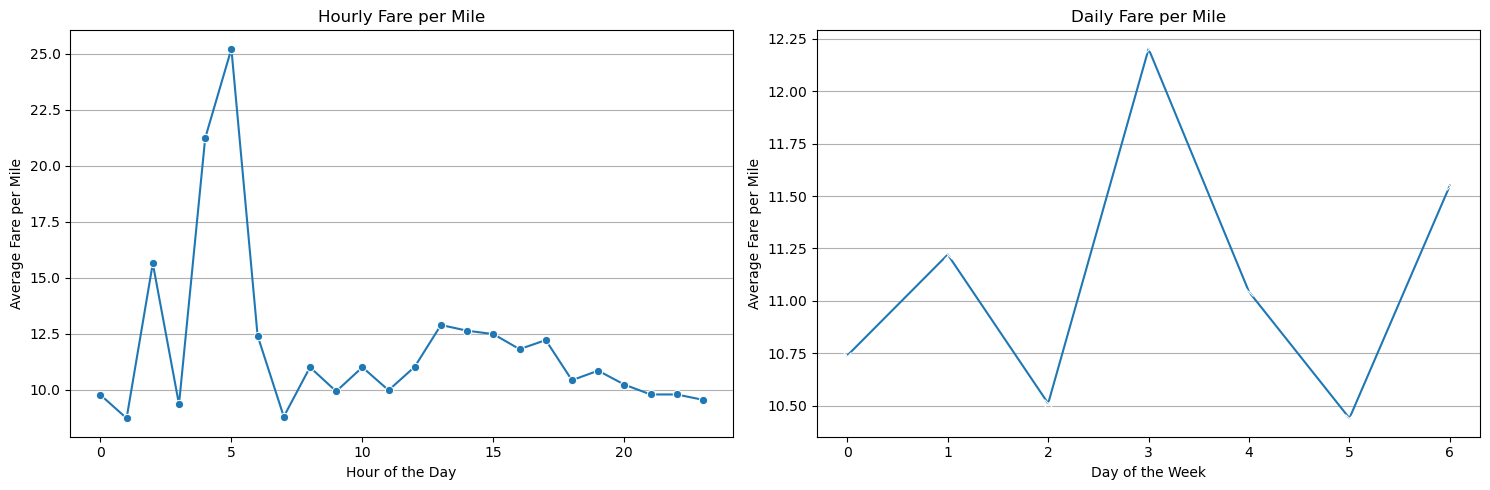

In [51]:
# Compare the average fare per mile for different days and for different times of the day

# Convert pickup date to correct format
df_merged_new['tpep_pickup_datetime'] = pd.to_datetime(df_merged_new['tpep_pickup_datetime'])

# Get the hour and day of week
df_merged_new['pickup_hour'] = df_merged_new['tpep_pickup_datetime'].dt.hour # Extract the hour of the day
df_merged_new['day_of_week'] = df_merged_new['tpep_pickup_datetime'].dt.dayofweek # Monday=0 , Sun=6

# Calculate the fare per mile
df_merged_new['fare_per_mile'] = df_merged_new['fare_amount'] / df_merged_new['trip_distance']

# Group data by 'pickup_hour' and calculate the average fare per mile for each hour
hourly_fare_per_mile = df_merged_new.groupby('pickup_hour')['fare_per_mile'].mean()

# Group data by 'day_of_week' and calculate the average fare per mile for each day of the week
daily_fare_per_mile = df_merged_new.groupby('day_of_week')['fare_per_mile'].mean()

# Plot the hourly fare per mile and daily fare per mile
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=hourly_fare_per_mile.index, y=hourly_fare_per_mile.values, marker='o')
plt.title('Hourly Fare per Mile')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.lineplot(x=daily_fare_per_mile.index, y=daily_fare_per_mile.values, marker='x')
plt.title('Daily Fare per Mile')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### The line plots show the average fare per mile for different hours of the day and different days of the week. The trends help in understanding the fare distribution based on the time of the day and day of the week.
### Hourly Fare per Mile: The fare per mile is highest during early morning hours (5-6 AM) and lowest during late night hours (1-5 AM). 
### Daily Fare per Mile: The fare per mile is highest on Thursday and lowest on Monday. 

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

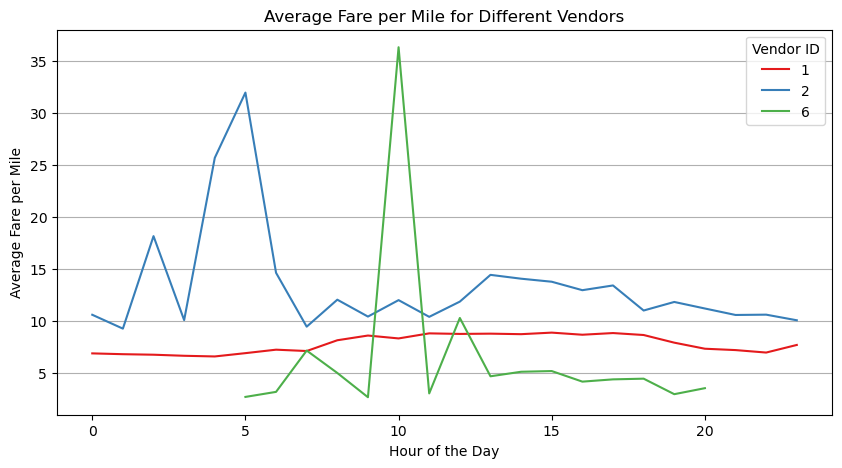

In [ ]:
# Compare fare per mile for different vendors

# Group data by 'VendorID' and 'pickup_hour'. This helps segregate the vendor and pickup data for analysis.
hourly_groupBy = df_merged_new.groupby(['VendorID', 'pickup_hour'])

hourly_fare_per_mile = hourly_groupBy['fare_per_mile'].mean().reset_index()

sns.lineplot(data=hourly_fare_per_mile, x='pickup_hour', y='fare_per_mile', hue='VendorID', palette='Set1')
plt.title('Average Fare per Mile for Different Vendors')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')
plt.legend(title='Vendor ID')
plt.show()

### 1.	The line plot shows the average fare per mile for different vendors for different hours of the day. 
### 2.	The trends help in understanding the fare distribution based on the vendor and time of the day.
### 3.	The avg fare per mile for vendor 2 is higher than vendor 1 for most of the hours of the day. This could be due to various reasons such as pricing strategy, service quality, etc.
### 4.	The fare per mile for vendor 2 is highest during early morning hours (5-6 AM) and lowest during late night hours (1-5 AM).
### 5.	The fare per mile for vendor 6 is highest during late morning hours (10-11 AM) and lowest during late night hours (1-5 AM).
### 6.	Overall Vendor 1 is having a pretty consistent pricing throughout the day. 
### 7.  Vendor 2 is having a higher pricing compared to Vendor 1. Vendor 6 is having a higher pricing during the day compared to night hours.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


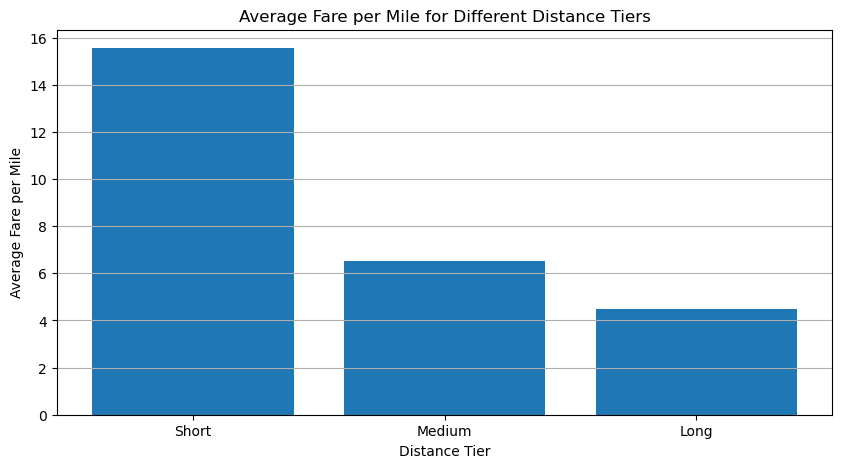

In [ ]:
# Defining distance tiers

# Calculate the average fare per mile for each distance tier
short_distance_avg_fare_per_mile = df_merged_new[df_merged_new['trip_distance'] <= 2]['fare_per_mile'].mean()
medium_distance_avg_fare_per_mile = df_merged_new[(df_merged_new['trip_distance'] > 2) & (df_merged_new['trip_distance'] <= 5)]['fare_per_mile'].mean()
long_distance_avg_fare_per_mile = df_merged_new[df_merged_new['trip_distance'] > 5]['fare_per_mile'].mean()

# Create a dictionary to store the average fare per mile for each distance tier for furthe usage in graph
distance_tier_fare_per_mile_dict = {'Short': short_distance_avg_fare_per_mile, 'Medium': medium_distance_avg_fare_per_mile, 'Long': long_distance_avg_fare_per_mile}

# Plot the average fare per mile for different distance tiers
plt.figure(figsize=(10, 5))
plt.bar(distance_tier_fare_per_mile_dict.keys(), distance_tier_fare_per_mile_dict.values())
plt.title('Average Fare per Mile for Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')
plt.show()

### The bar plot shows the average fare per mile for different distance tiers. The fare per mile is highest for short distance trips, followed by medium distance trips and long distance trips.
### This shows that the fare per mile decreases as the distance of the trip increases.

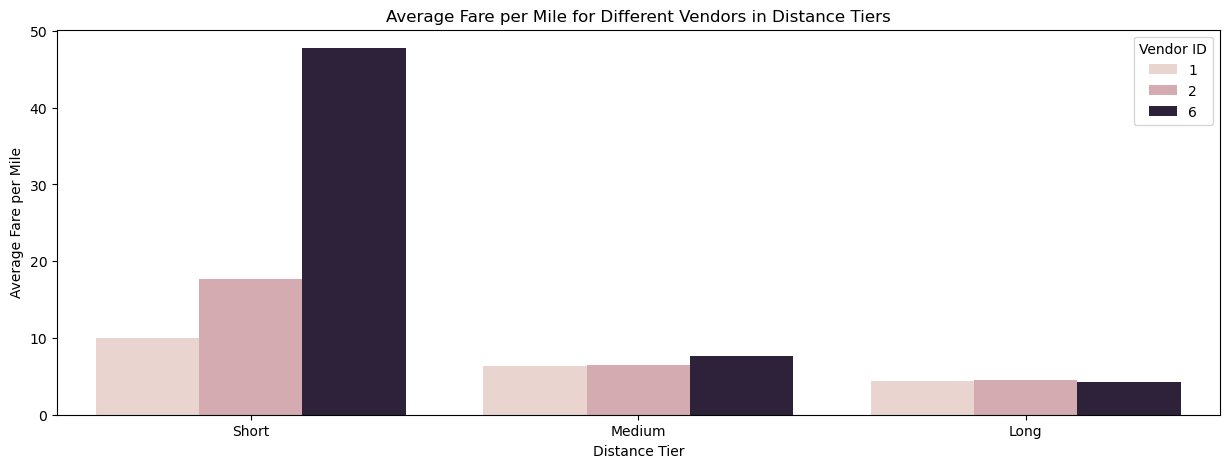

In [ ]:
# Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.

# Create a new column 'distance_tier' based on the trip distances. based on pandas documentation use the pd.cut function to categorize the distances using bins
df_merged_new['distance_tier'] = pd.cut(df_merged_new['trip_distance'], bins=[0, 2, 5, np.inf], labels=['Short', 'Medium', 'Long'])

vendor_distance_groupBy = df_merged_new.groupby(['VendorID', 'distance_tier'])

# Calculate the average fare per mile for each vendor 
vendor_distance_tier_fare_per_mile = vendor_distance_groupBy['fare_per_mile'].mean().reset_index() 

# Show the average fare per mile for different vendors in a tiered fashion
plt.figure(figsize=(15, 5))
ref = sns.barplot(data=vendor_distance_tier_fare_per_mile, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile for Different Vendors in Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title='Vendor ID')

### 1.The bar plot shows the average fare per mile for different vendors in a tiered fashion based on the distance tiers.
### 2.	The trends help in understanding the fare distribution based on the vendor and distance tier.
### 3.	The fare per mile is highest for vendor 6 in Medium and Short distances.
### 4.	The fare per mile is highest for vendor 2 in Long distance
### 5.	The fare per mile for vendor 2 is highest for long distance trips, 2nd highest in medium and short distance trips.
### 6.	The fare per mile for vendor 6 is highest for medium distance trips and highest for short distance trips, and lowest for long distance trips.
### 7.	The fare per mile for vendor 1 is lowest for all distance tiers.
### 8.	Overall Vendor 6 seems expensive. 


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

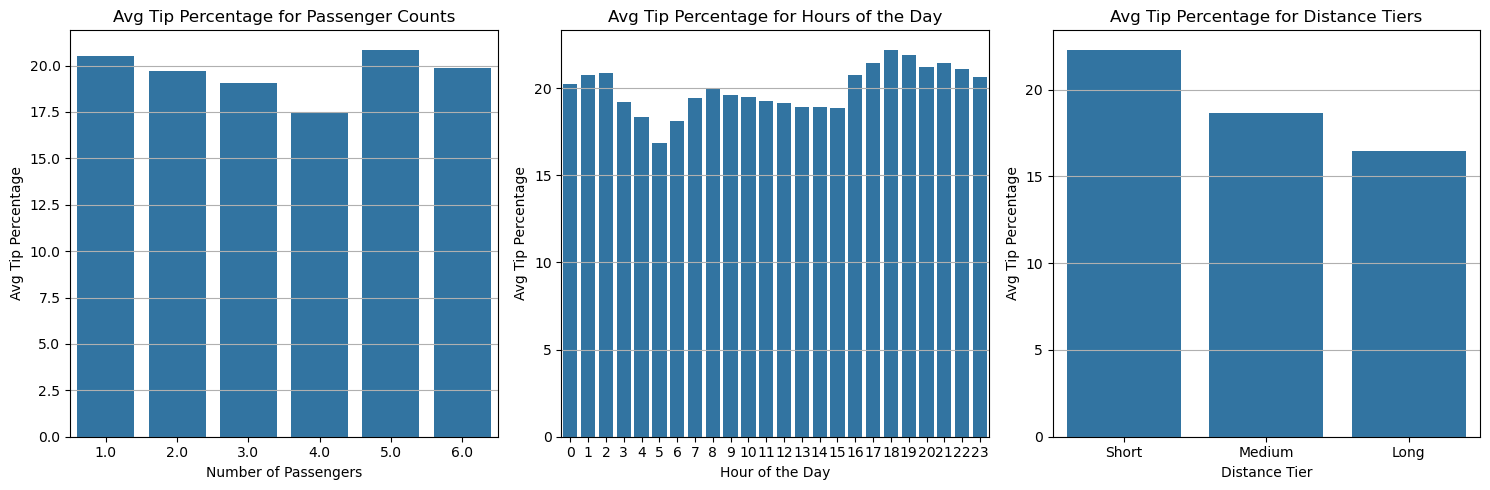

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate the tip percentage
df_merged_new['tip_percentage'] = (df_merged_new['tip_amount'] / df_merged_new['fare_amount']) * 100

# Group data by 'passenger_count' and calculate the average tip percentage for each passenger count
passenger_tip_percentage = df_merged_new.groupby('passenger_count')['tip_percentage'].mean()

# Group data by 'pickup_hour' and calculate the average tip percentage for each hour of the day
hourly_tip_percentage = df_merged_new.groupby('pickup_hour')['tip_percentage'].mean()

# Group data by 'distance_tier' and calculate the average tip percentage for each distance tier
distance_tip_percentage = df_merged_new.groupby('distance_tier')['tip_percentage'].mean()

# Plot the average tip percentage for different passenger counts, hours of the day, and distance tiers
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=passenger_tip_percentage.index, y=passenger_tip_percentage.values)
plt.title('Avg Tip Percentage for Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Avg Tip Percentage')
plt.grid(axis='y')

plt.subplot(1, 3, 2)
sns.barplot(x=hourly_tip_percentage.index, y=hourly_tip_percentage.values)
plt.title('Avg Tip Percentage for Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Avg Tip Percentage')
plt.grid(axis='y')

plt.subplot(1, 3, 3)
sns.barplot(x=distance_tip_percentage.index, y=distance_tip_percentage.values)
plt.title('Avg Tip Percentage for Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Avg Tip Percentage')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Avg tip percentage by distance tier is highest for short distance trips, followed by medium distance trips and long distance trips.
### Avg tip percentage by passenger count is highest for 1 and 5 passengers and lowest for 4 passengers.
### Avg tip percentage by hour of the day is highest during evening hours (6-7 PM) and lowest during early morning hours (5-6 AM).


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
### ToDo: Need to revisit the solution

# Calculate the trip duration in minutes
df_merged_new['trip_duration'] = (pd.to_datetime(df_merged_new['tpep_dropoff_datetime']) - df_merged_new['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter data for trips with tip percentage < 10% and trips with tip percentage > 25%
low_tip_trips = df_merged_new[df_merged_new['tip_percentage'] < 10]
high_tip_trips = df_merged_new[df_merged_new['tip_percentage'] > 25]

# Calculate the average fare amount for low tip trips and high tip trips
avg_fare_low_tip = low_tip_trips['fare_amount'].mean()
avg_fare_high_tip = high_tip_trips['fare_amount'].mean()

# Calculate the average trip distance for low tip trips and high tip trips
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

# Calculate the average trip duration for low tip trips and high tip trips
avg_duration_low_tip = low_tip_trips['trip_duration'].mean()
avg_duration_high_tip = high_tip_trips['trip_duration'].mean()

# Calculate the average total amount for low tip trips and high tip trips
avg_total_amount_low_tip = low_tip_trips['total_amount'].mean()
avg_total_amount_high_tip = high_tip_trips['total_amount'].mean()

# Calculate the average tip amount for low tip trips and high tip trips
avg_tip_amount_low_tip = low_tip_trips['tip_amount'].mean()
avg_tip_amount_high_tip = high_tip_trips['tip_amount'].mean()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

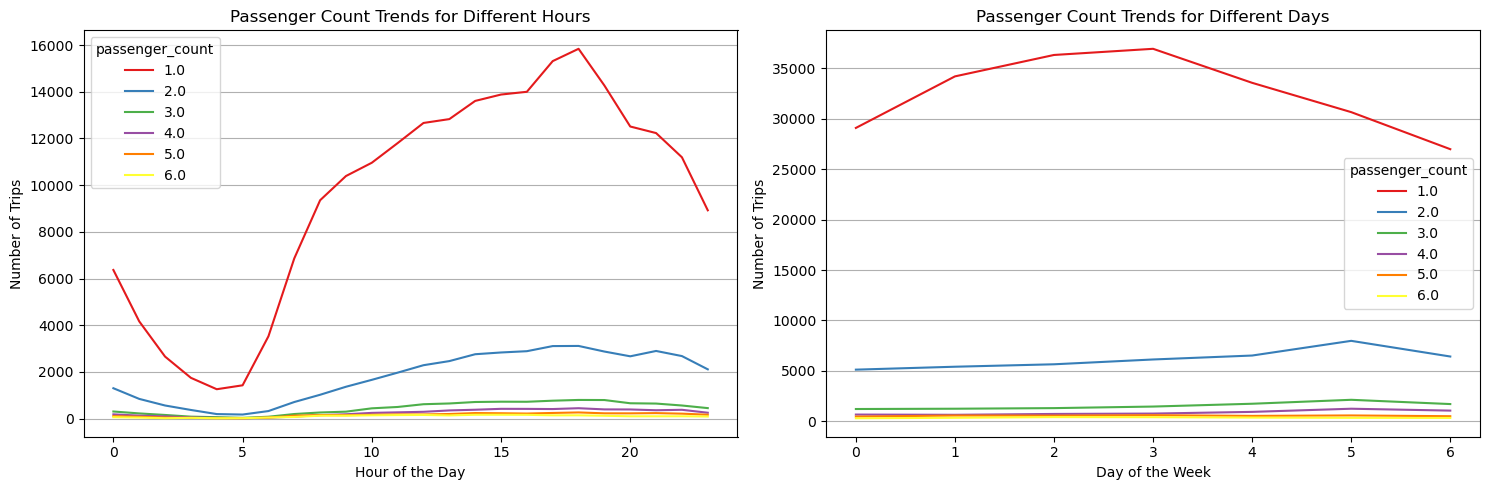

In [ ]:
# See how passenger count varies across hours and days

# Group data by 'pickup_hour' and 'passenger_count' and calculate the average passenger count for each hour
hourly_passenger = df_merged_new.groupby(['pickup_hour', 'passenger_count']).size().reset_index(name='Num_of_Trips')

# Group data by 'day_of_week' and 'passenger_count' and calculate the average passenger count for each day of the week
daily_passenger = df_merged_new.groupby(['day_of_week', 'passenger_count']).size().reset_index(name='Num_of_Trips')

# Show the passenger count trends for different hours and days side by side for better comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=hourly_passenger, x='pickup_hour', y='Num_of_Trips', hue='passenger_count', palette='Set1')
plt.title('Passenger Count Trends for Different Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.lineplot(data=daily_passenger, x='day_of_week', y='Num_of_Trips', hue='passenger_count', palette='Set1')
plt.title('Passenger Count Trends for Different Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 1.	The graph shows that passenger count is high during evening hours (3-7 PM) and low during early morning hours (5-6 AM) for passenger count 1 and 2
### 2.	The passenger counts 1 is highest on Thursday and lowest on Monday and Sundays for passenger count 1 whereas passenger count 2 is highest on Saturday and lowest on Mondays.
### 3.	For passenger count 3 to 6 the number of trips is almost similar for all days of the week and hours of the day.


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

# Group data by 'PULocationID' and 'passenger_count' and calculate the average passenger count for each zone
zone_passenger_count = df_merged_new.groupby(['PULocationID', 'passenger_count']).size().reset_index(name='Number_of_Trips')

# Since there are many zones, let's find the top 10 zones with the highest number of trips
top_10_zones = zone_passenger_count.groupby('PULocationID')['Number_of_Trips'].sum().nlargest(10).index # Find the top 10 zones with the highest number of trips

# Filter the data for the top 10 zones
top_10_zones_data = zone_passenger_count[zone_passenger_count['PULocationID'].isin(top_10_zones)] # Filter the data for the top 10 zones

# Plot the passenger count trends for the top 10 zones
plt.figure(figsize=(15, 5))
sns.lineplot(data=top_10_zones_data, x='PULocationID', y='Number_of_Trips', hue='passenger_count', palette='Set1')
plt.title('Passenger Count Trends for Top 10 Zones')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.legend(title='Passenger Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### The line plot shows the passenger count trends for the top 10 zones with the highest number of trips. 
### The line plot shows the passenger count trends for the top 10 zones with the highest number of trips. 
### 1.	The graph represents Passenger Count Trends for Top 10 Zones, with the x-axis labeled as Location ID and the y-axis as Number of Trips. Here's an analysis of key trends:
### 2.	Passenger Count 1 Dominates:
### The red line (Passenger Count = 1) has significantly higher values than other categories.
### It fluctuates between approximately 7,000 and 11,000 trips, indicating that most trips involve a single passenger.
### 3.	Passenger Count 2 is the Second Highest:
### The blue line (Passenger Count = 2) has values mostly between 1,000 and 3,500 trips. There is a slight upward trend as location ID increases.
### 4.	Passenger Counts 3 to 6 are Minimal:
### These are represented by green, purple, orange, and yellow lines. 
### Their values are relatively low, staying below 1,000 trips.
### They appear to have a similar trend, with minor variations.
### 5.	Fluctuations at Certain Location IDs:
### There are noticeable drops and spikes at specific points.
### Location IDs near 160 and 240 have significant changes in trends, particularly for Passenger Count 1.
### Possible Interpretations:
### Most trips are taken by a single passenger, possibly indicating high demand for individual transport (e.g., taxis, rideshares).
### Sharp fluctuations at some locations may indicate varying levels of activity or popular pickup/drop-off points.
### Higher passenger counts (3+) are rare, suggesting that shared or group transport is less common.

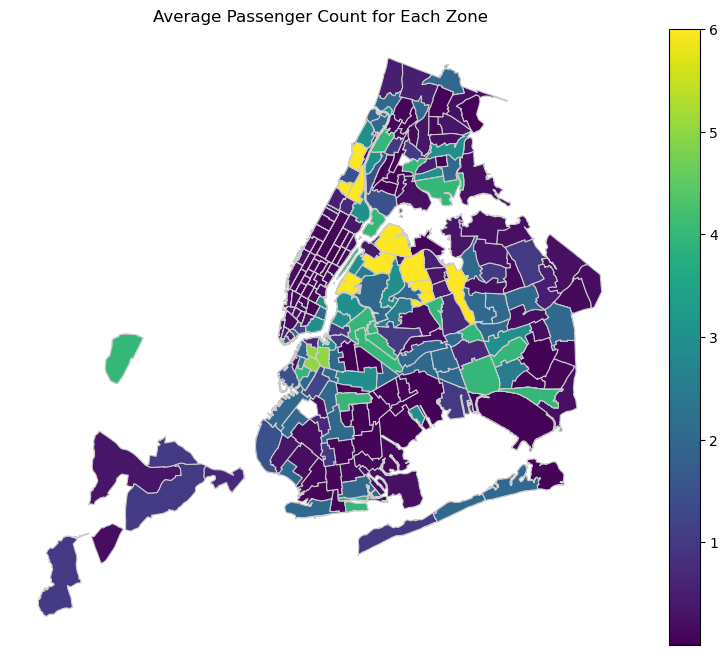

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Merge the 'zones' and 'zone_passenger_count' dataframes using 'LocationID' and 'PULocationID'
zones_with_trips = pd.merge(zones, zone_passenger_count, left_on='LocationID', right_on='PULocationID', how='left') # merged on left join because we want to keep all zones

# Fill NaN values with 0 for better outcome
zones_with_trips['Number_of_Trips'] = zones_with_trips['Number_of_Trips'].fillna(0)
zones_with_trips['passenger_count'] = zones_with_trips['passenger_count'].fillna(0)

# Calculate the average passenger count per trip for each zone
zones_with_trips['avg_passenger_count'] = zones_with_trips['passenger_count'] / zones_with_trips['Number_of_Trips']

# Plot the average passenger count for each zone on the map
fig, ax = plt.subplots(1, 1, figsize=(10 ,8))
zones_with_trips.plot(column='avg_passenger_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Passenger Count for Each Zone')
plt.axis('off')
plt.show()

### Yellow represents the highest average passenger count, while purple represents the lowest average passenger count.
### Yellow seems to be concentrated in the central area, while purple is more spread out.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

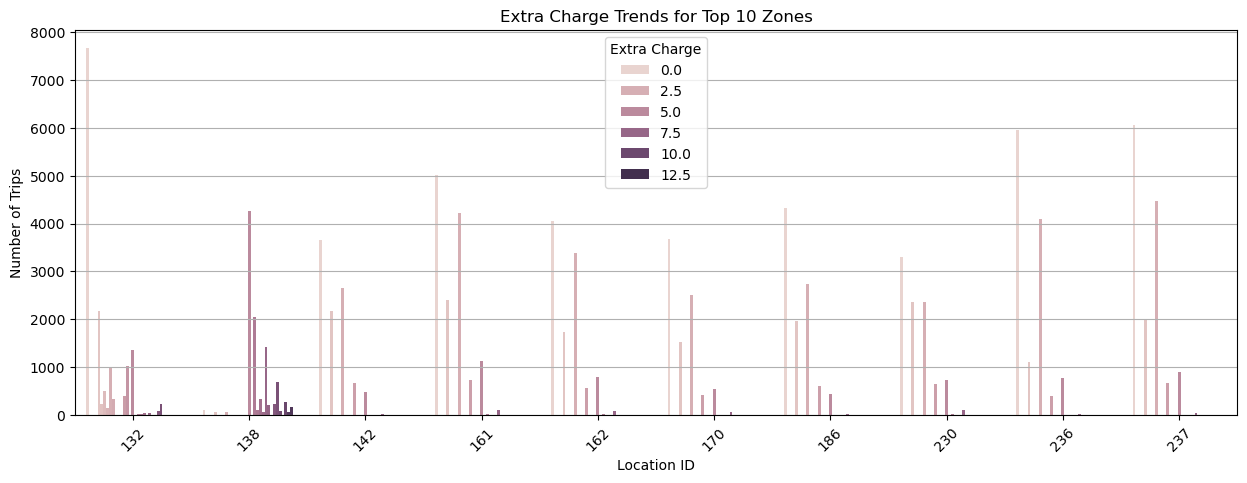

In [ ]:
# How often is each surcharge applied?

# Group data by 'PULocationID' and 'extra' and calculate the number of trips for each zone and extra charge
pickup_extra_charges = df_merged_new.groupby(['PULocationID', 'extra']).size().reset_index(name='Number_of_Trips') # Count the number of trips for each zone and extra charge

# Find the top 10 zones with the highest number of trips
top_10_zones_extra = pickup_extra_charges.groupby('PULocationID')['Number_of_Trips'].sum().nlargest(10).index # Find the top 10 zones with the highest

# Filter the data for the top 10 zones
top_10_zones_extra_data = pickup_extra_charges[pickup_extra_charges['PULocationID'].isin(top_10_zones_extra)] # Filter the data for the top 10

# Plot the extra charge trends for the top 10 zones
plt.figure(figsize=(15, 5))
sns.barplot(data=top_10_zones_extra_data, x='PULocationID', y='Number_of_Trips', hue='extra', width=0.8)     
plt.title('Extra Charge Trends for Top 10 Zones')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.legend(title='Extra Charge')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### The lighter shades show most of the trips do not incur extra charges, while the darker shades represent trips with extra charges.
### Darker bar occurence is less showing lesser frequency of extra charge application
### Darker bars representing extra charges seems to be more frequent in zones 132, 138 may be due to peak hours or night hours where extra charges are applicable. 

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
###1. Taxi Deployment: Deploy more taxis during peak hours (evening rush hours) 3pm to 8pm and in zones with high demand (LocationId 70, 132, 138) reduce waiting times and increase customer satisfaction. Use the traffic trends to allocate taxis efficiently based on the demand.

###2. Service Quality: 
### The average fare per mile is high for 1 passenger for short distance and reduces with every passenger count per mile. This is obvious as with more number of passengers means the amount will get divided amongst them. 
### The taxi comapany can think about rationalizing the fares for short distance to increase the demand.
### Taxi company can think about providing incentives for drivers to offer better service and increase customer satisfaction.

###3. Passenger Experience: 
### Fare per mile per passenger is more for 1 passenger and decreases with increase in passenger count. This high price for short distance could dissuade the passengers from hailing taxi for short distance.
### Taxi company can think of increasing the taxi demand by introducing shared rides and optimize the dispatching of taxis for group transport. This will help to reduce costs for passengers and increase revenue.
    
###4. Reduce Operational Costs: 
### Taxi company can improve operational cost efficiency by reducing the surcharge expenses by optimizing the routes. This cost savings can then be shared with customers to increase their satisfaction and increase demand, hence revenue
    
###5. Data Collection: Invest in real-time data collection and analysis to monitor traffic patterns, demand trends. Data driven insights can help improve efficiencies.

###6. Driver Training: Provide training to drivers and company staff. Improve customer service, and operational efficiency to increase customer satisfaction and loyalty.

### These are few methods using which taxi companies can improve demand, optimize routing increase operational efficiencies



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
###1.	Peak Hour Deployment: 
### The highest activity occurs between 15:00 to 20:00 hours, indicating a strong evening rush. The pickup zones show different peak levels, with some zones exceeding 1000 trips at peak. Routes like 132 and 237.
### So, position cabs in zones with high demand during peak hours (evening rush hours) to maximize revenue and utilization. Deploy extra taxis in areas with high activity (airports, offices, malls etc) to reduce waiting times and increase customer satisfaction.

###2.	Weekend Deployment: 
### Weekends the demand for taxi is relatively lower than week days.
### Usual trend for weekend demand on Saturdays is more between 3PM to 8PM. Whereas on Sundays it’s the lowest amongst the 7 days.
### One interesting trend is seen in Saturdays where the demand shoots up a bit after 8PM till late night. This may be indication of people going out for parties/malls/restaurants etc and hailing cab services for travelling.
### This is good data to strategically position cabs near such locations to increase demand and revenues on weekends.
    
###3.	Nighttime Deployment: 
### Nighttime (11 to 5PM) can be utilized to increase revenue by providing secure and reliable taxi service to zones where there is more demand. E.g. Location no. 79, 132, 249 seem to have most number of wither pickups or drops. Cabs can be strategically positioned here and near nightlife spots for partygoers.

###4.	Shared Options: 
### Overall trend for shared passenger above 3 is very low. Taxi company can advertise shared cab options to reduce costs for passengers and increase revenue. Position cabs strategically in areas with high demand for shared rides to optimize dispatching and routing.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
###1. Dynamic Pricing: Implement dynamic pricing strategies based on the time of the day, day of the week, and distance tiers to maximize revenue. 
### Usually high demand for:
### pick-ups is during - 3PM – 8PM
### day of the week – Friday, Thursday and Wednesday
### distance tier rates – Short distance demand is more followed by medium and long. Provide incentives for long distance bookings

### Offer discounts during low-demand hours to attract more customers and increase utilization.

###2. Surge Pricing: Taxi company can think of implement surge pricing during peak hours and in zones with high demand to maximize revenue. 

###3. Pricing: Implement distance-based pricing to offer competitive rates for short, medium, and long-distance trips. 
### Offer discounts for shared rides and group transport to increase revenue and customer loyalty. 
    
###4. Incentive Programs: Offer incentives for drivers to provide excellent service, improve customer satisfaction, and increase revenue. Have reward programs based on customer ratings.
